<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/HW_JudsonLimaP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging HW 1

Judson Lima

OPTI 556, Fall 2023

##Fourier series estimation of a signal:

Estimation is done using 4 signals, intent is to show a similar effect to Figure 2.4 of the textbook. First step is to apply the initialization code, this then can be used to show a Fourier series representing a signal $f(x)$ within a given interval [-L , L].


##Libraries

In [104]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io
from google.colab import files
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib as mpl
import scipy.integrate as integrate

from scipy.interpolate import interp1d, InterpolatedUnivariateSpline, splrep, sproot
from scipy import integrate
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})

##List of Signals for series estimation

  First function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        1 &\text{ for } -.25<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
  $$


  Second function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        2*(x+.25) &\text{ for } -.25<x\leq .25\\
        1 &\text{ for } .25<x
    \end{aligned}}\right.
  $$

  Third function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        4(x+.25) &\text{ for } -.25<x\leq 0\\
        -4(x-.25) &\text{ for } 0<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
  $$

  Forth function,
  $$
  f(x)=\left \lbrace {
     \begin{aligned}
        0 &\text{ for } x \leq -.25\\
        1 &\text{ for } -.25<x\leq 0\\
        -1 &\text{ for } 0<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
  $$

In [30]:
# function 1
def f1(x):
  if x<-.25:
    f1=0.
  elif x<.25:
    f1=1.
  else:
    f1=0.
  return f1

# function 2
def f2(x):
  if x<-.25:
    f2=0.
  elif x<.25:
    f2=2.*(x+.25)
  else:
    f2=1.
  return f2

#function 3
def f3(x):
  if x<-.25:
    f3=0.
  elif x<=0:
    f3=4.*(x+.25)
  elif x<=.25:
    f3=-4.*(x-.25)
  else:
    f3=0.
  return f3

#function 4
def f4(x):
  if x<-.25:
    f4=0.
  elif x<0:
    f4=1.
  elif x<.25:
    f4=-1.
  else:
    f4=0.
  return f4

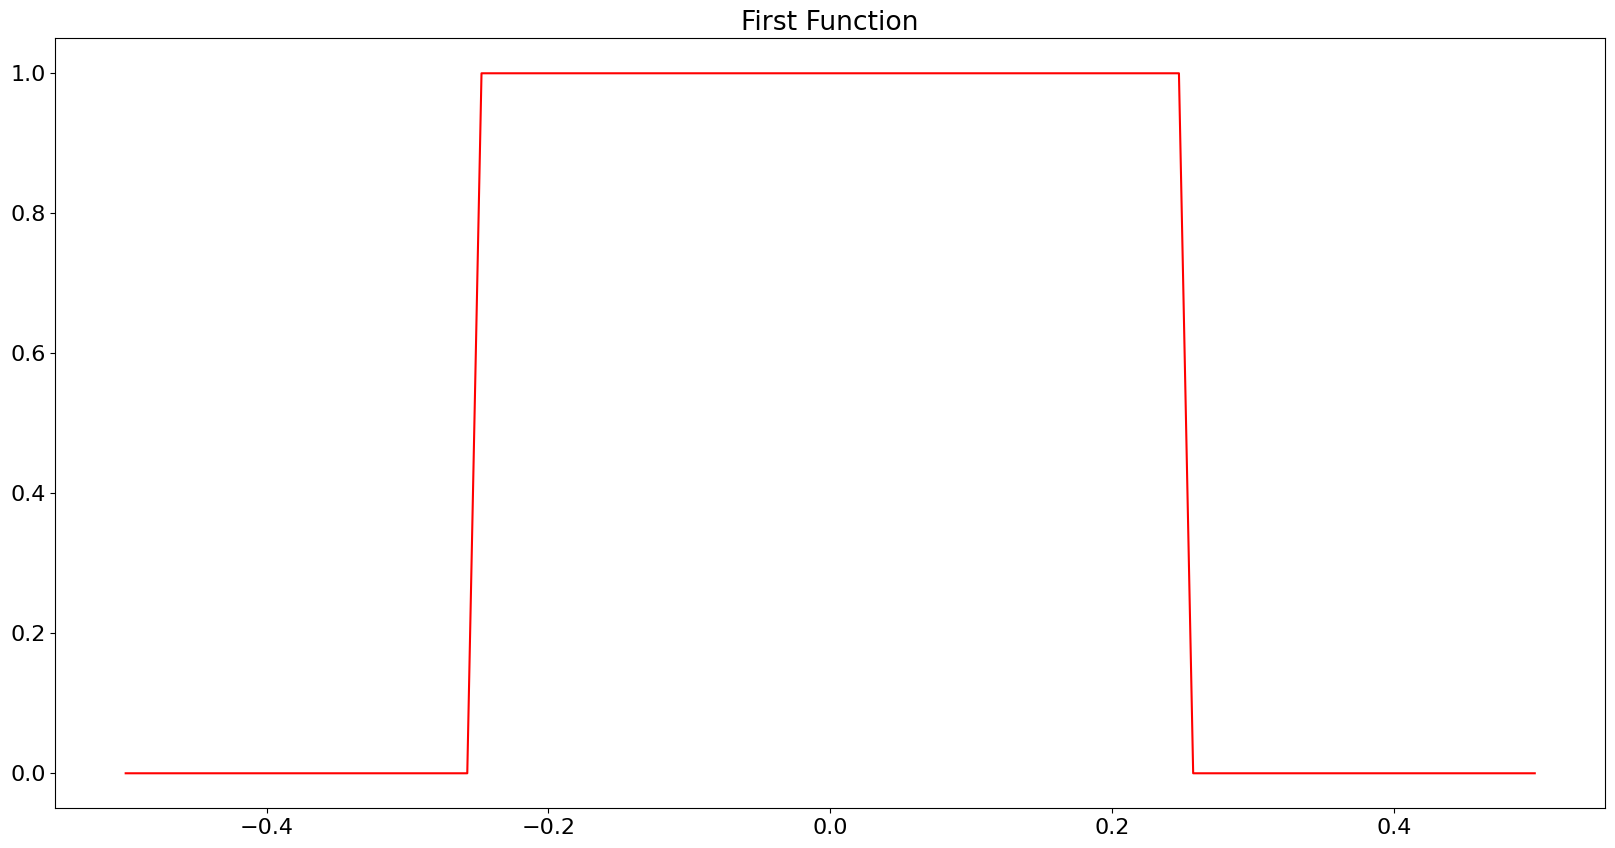

In [8]:
from numpy import vectorize
vf1 = vectorize(f1)
plt.plot(np.linspace(-.5,.5,1000),vf1(np.linspace(-.5,.5,1000)),'r')
plt.title("First Function")
plt.savefig('exampleFF.png')


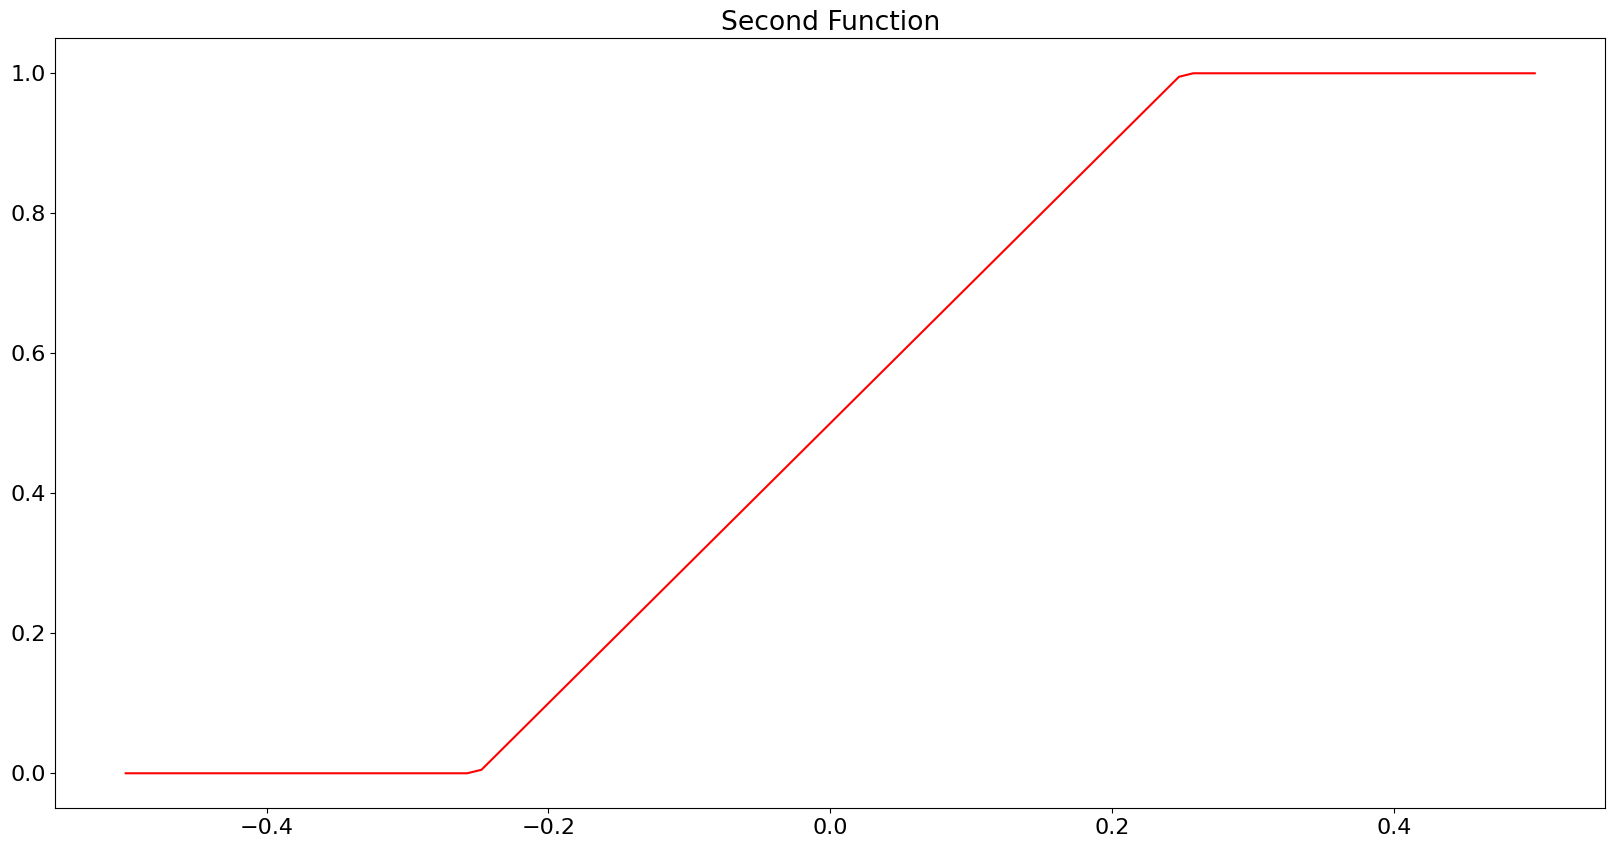

In [21]:
vf2 = vectorize(f2)
plt.plot(np.linspace(-.5,.5,100),vf2(np.linspace(-.5,.5,100)),'r')
plt.title("Second Function")
plt.savefig('exampleSF.png')

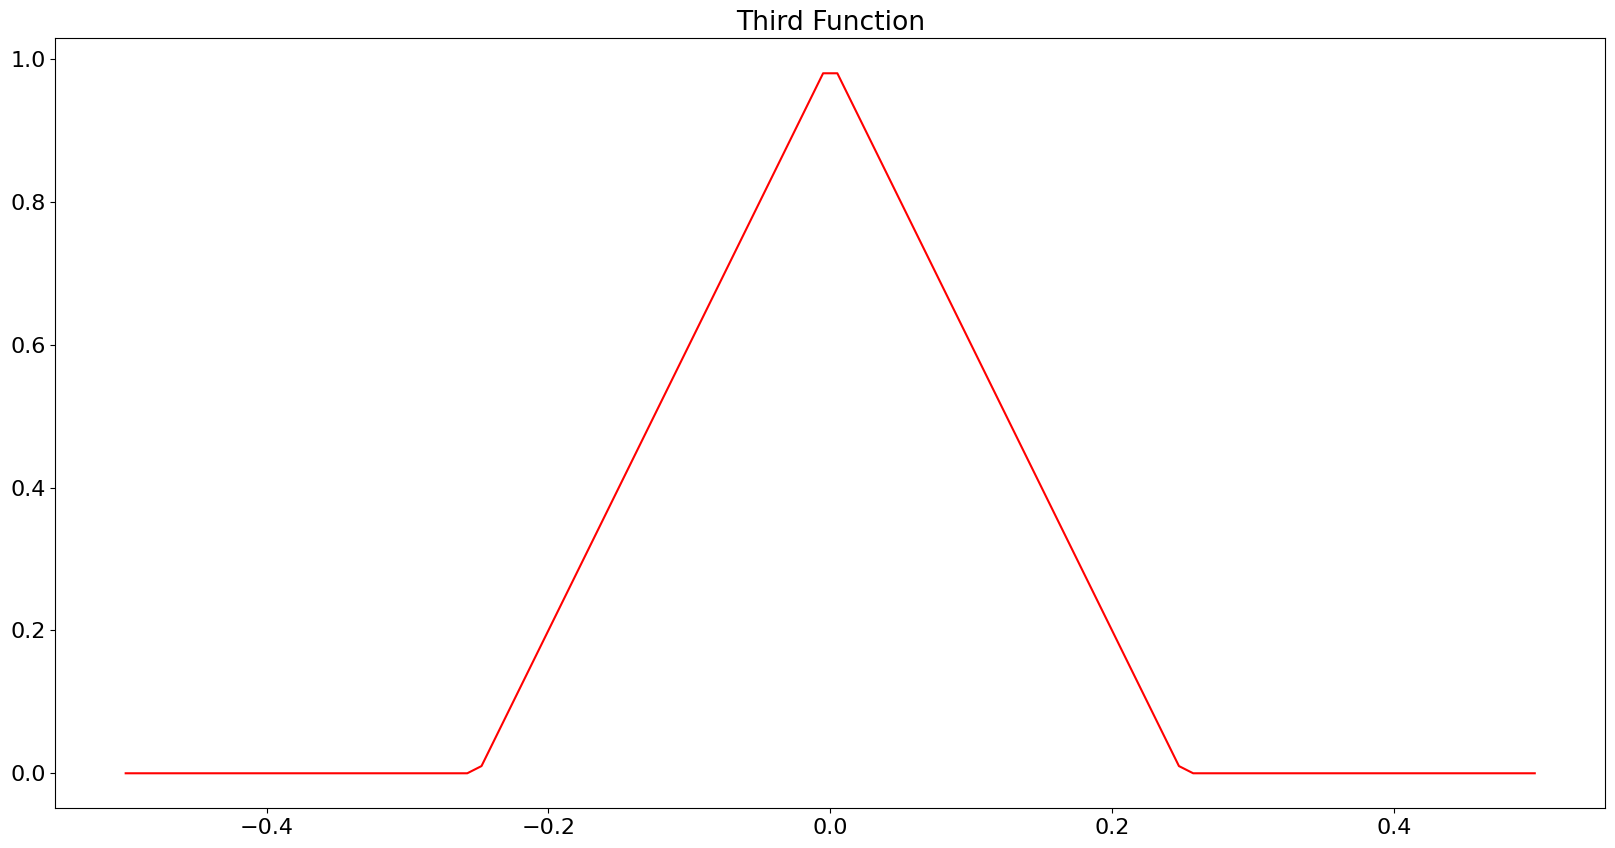

In [35]:
vf3 = vectorize(f3)
plt.plot(np.linspace(-.5,.5,100),vf3(np.linspace(-.5,.5,100)),'r')
plt.title("Third Function")
plt.savefig('exampleTF.png')

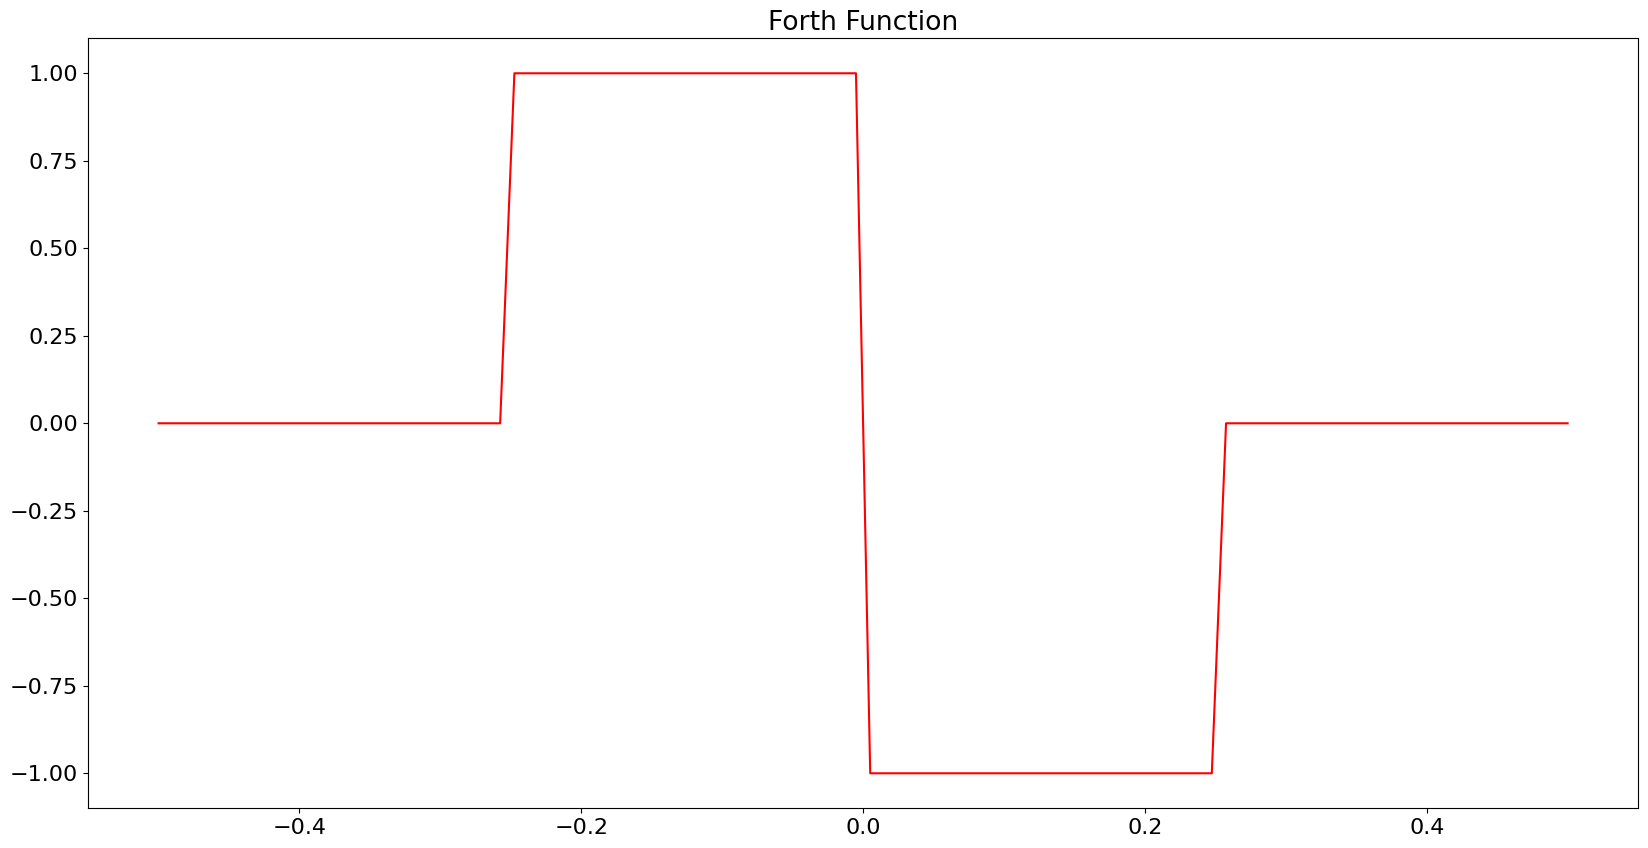

In [36]:
vf4 = vectorize(f4)
plt.plot(np.linspace(-.5,.5,100),vf4(np.linspace(-.5,.5,100)),'r')
plt.title("Forth Function")
plt.savefig('exampleFhF.png')

##Fourier series estimation of a signal

As shown below, with more terms, a clser approximation can be seen. The Gibbs phenomena can been seen throughout the approximations, especially around step-like patterns (ex, value goes from 1 to 0).

<ipython-input-54-0ac725d86d94>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, pt)


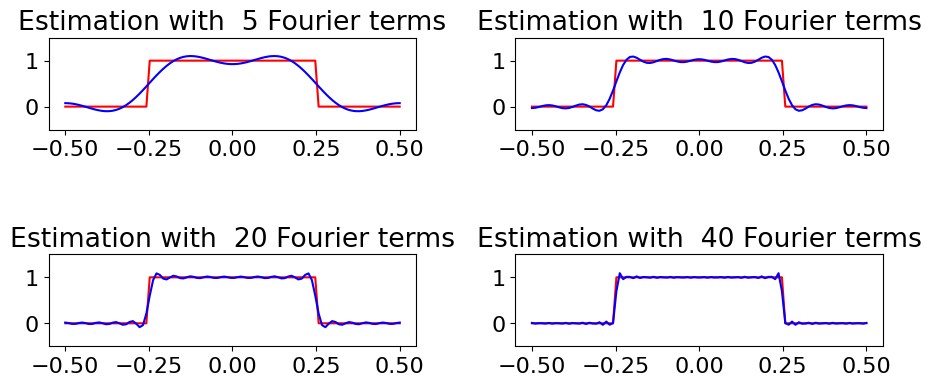

In [54]:

pt=0;
plt.subplots(figsize=(10,5))
xrange=np.linspace(-.5,.5,100);
for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf1(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
    cv[pop]=2*integrate.quad(lambda x: vf1(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
      return pxx
  plt.subplot(2, 2, pt)
  plt.plot(xrange,vf1(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
  plt.ylim(-.5, 1.5)
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('exampleFFSexpansion.png')

<ipython-input-45-18f6bbc8df89>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, pt)


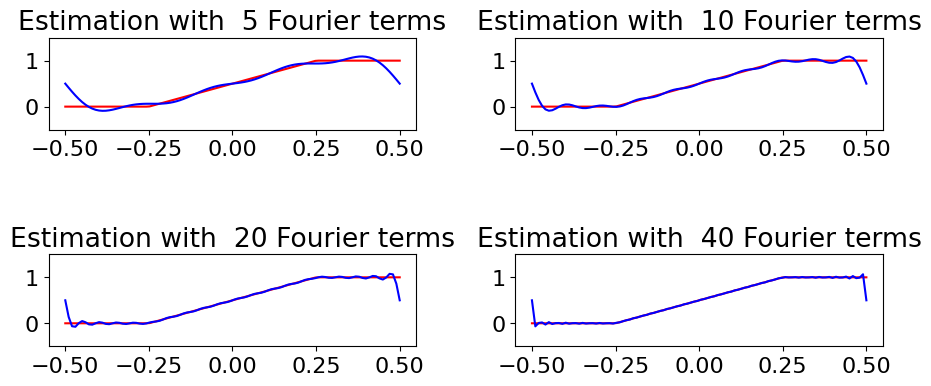

In [45]:

pt=0;
plt.subplots(figsize=(10,5))
xrange=np.linspace(-.5,.5,100);
for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf2(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
    cv[pop]=2*integrate.quad(lambda x: vf2(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
      return pxx
  plt.subplot(2, 2, pt)
  plt.plot(xrange,vf2(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
  plt.ylim(-.5, 1.5)
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('exampleSFSexpansion.png')

<ipython-input-46-e8554d60d8c4>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, pt)


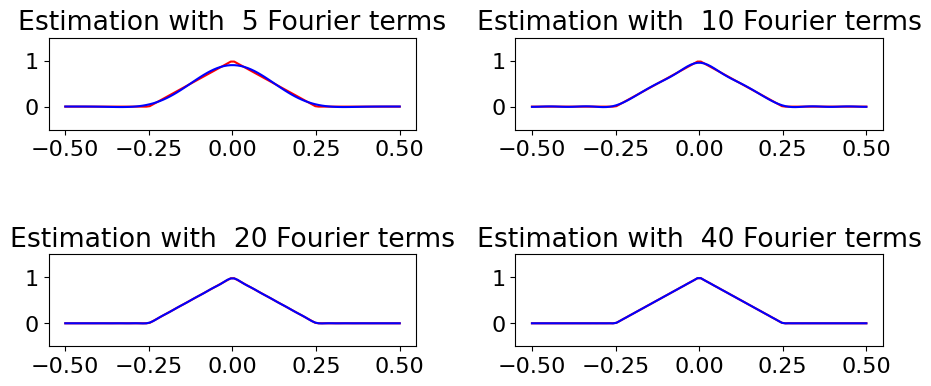

In [46]:

pt=0;
plt.subplots(figsize=(10,5))
xrange=np.linspace(-.5,.5,100);
for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf3(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
    cv[pop]=2*integrate.quad(lambda x: vf3(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
      return pxx
  plt.subplot(2, 2, pt)
  plt.plot(xrange,vf3(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
  plt.ylim(-.5, 1.5)
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('exampleTFSexpansion.png')

<ipython-input-51-8259f00dd726>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, pt)


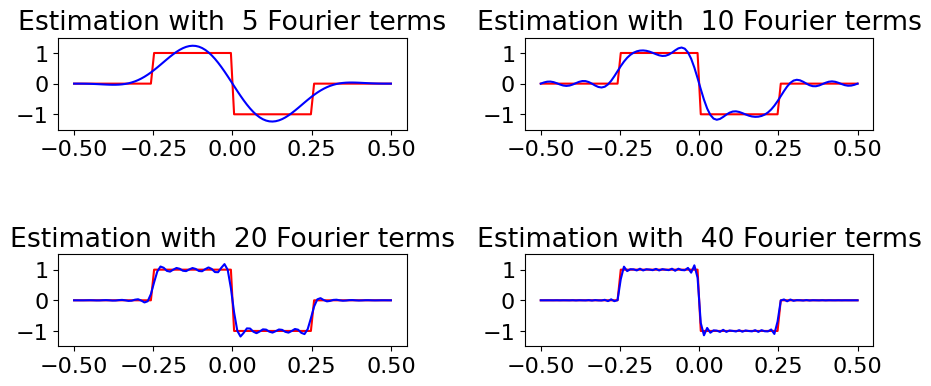

In [51]:

pt=0;
plt.subplots(figsize=(10,5))
xrange=np.linspace(-.5,.5,100);
for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf4(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
    cv[pop]=2*integrate.quad(lambda x: vf4(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
      return pxx
  plt.subplot(2, 2, pt)
  plt.plot(xrange,vf4(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
  plt.ylim(-1.5, 1.5)
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('exampleFhFSexpansion.png')

## DFT for Various signals

The sampling theorem states that a bandlimited function is exactly represented by the discrete sum of its values at appropriately spaced sample points using the interpolation function $sinc(x)$.

The sampling theorem states that $f_B(x)$ can be reconstructed using the interpolation rule as long as the sampling period, $∆$ , does not exceed the *Nyquist limit* $\frac{1}{2B}$ from the relationship $x = \frac{n}{2B}$.

The later section,"Using a B-Spline interpolator instead", shows the use of a spline interpolator, B-spline interpolation is identical to Shannon interolation as the order approaches infinity. Unfortunately, since the tails of the sinc extend to infinity, Shannon interpolation is computationally intense. The B-splines of finite order have finite support and thus are convenient for approximation of Shannon interpolation, this makes them alot easier to work with for computation.



##List of signals used

Function 1:
$f(x)=cos (\frac{2\pi }{x}) sinc(\frac{\pi x}{10})
$

Function 2:
$f(x)=\frac{1}{\sqrt(2\pi\sigma^2)}e^-\frac{ x^2}{2\sigma^2} cos (\frac{2\pi }x)
$

Function 3:
$f(x)=sinc({.5\pi x})
$


##Using a B-Spline interpolator to mimic Aliasing and low pass filtering

Using the same functions for a few of the signal variations from the last section we can see how they compare to the Shannon interpolation.

###Aliasing
The relationship between the signal and the measurements is impacted by the sampling rate and the sampling function. If the sampling rate is too low, aliasing will occur and high frequency signal components will be wrapped into lower frequency measurement signals.

###Low pass filtering
The sampling function determines the transfer function. For energy conserving systems, modulation transfer function is less then 1. Due to this, the frequencies are supressed and fain must be introduced to attempt to recover the signal. Systems use a low pass measurment where over a range,bandpass, is determined to be acceptable. A narrower sampling function corresponds to higher frequency bandpass, a wider sampling function leads to narrower bandpass. The final transfer function will be the product of the optical transfer function and the sampling transfer function.

###List of signals

Function 1:
$f(x)=cos (\frac{2\pi }{x}) sinc(\frac{\pi x}{10})
$

Function 2:
$f(x)=\frac{1}{\sqrt(2\pi\sigma^2)}e^-\frac{ x^2}{2\sigma^2} cos (\frac{2\pi }x)
$

Function 3:
$f(x)=sinc({.5\pi x})
$

Low-pass filtering method based on Harr sampling method where:
$h(x)={\rm rect}\left (\frac{x}{\Delta}\right)$


First signal,

5x over sampling
sampling rate .1, 5 times Nyquist

<ipython-input-111-0b391b8f0cb6>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


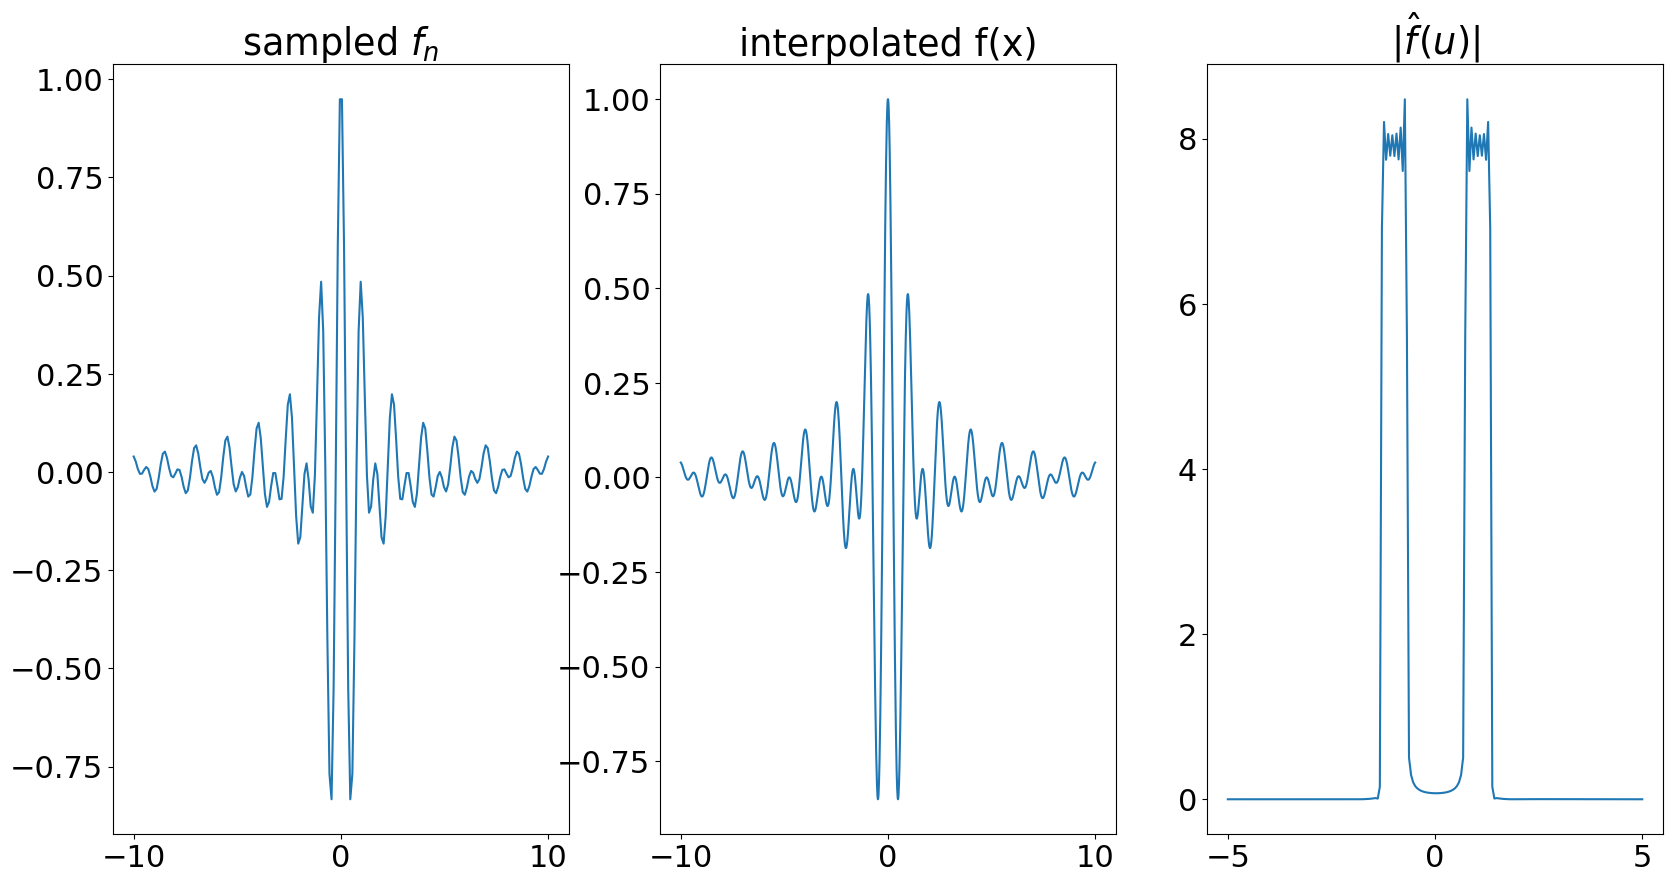

In [111]:
X=10
samplingRate=.1
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.sinc(np.pi*x/5)
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos5XNyquist.png')

First signal,

1.5x over sampling
sampling rate 1/3, 1.5 times Nyquist

<ipython-input-18-55530e209b8f>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


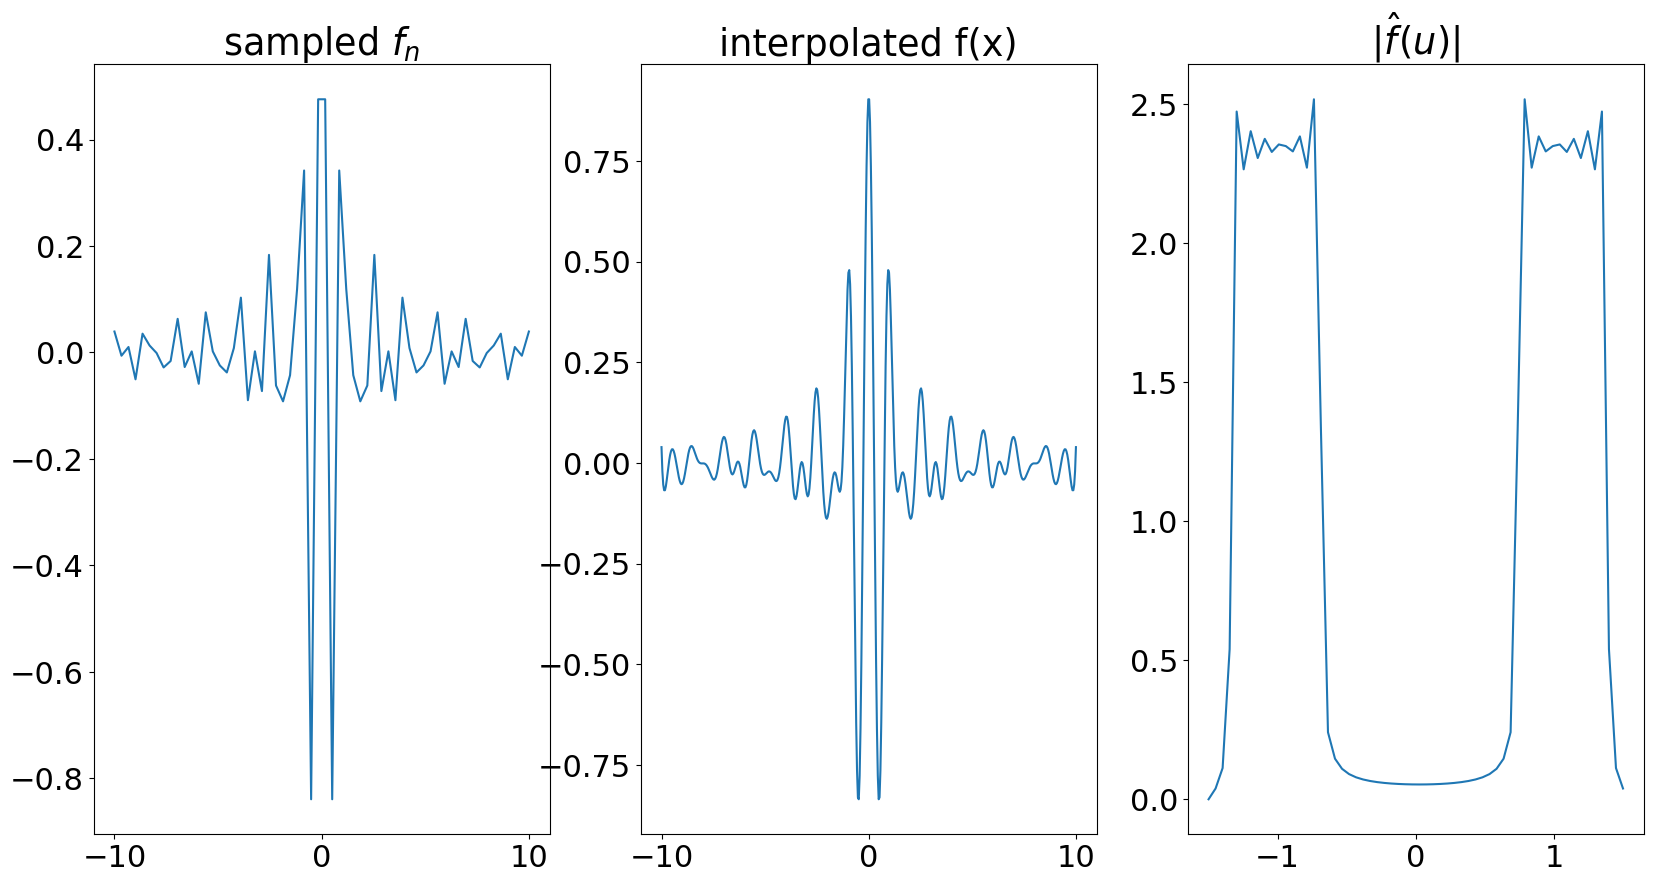

In [18]:
X=10
samplingRate=1/3
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.sinc(np.pi*x/5)
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos_sinc1p5XNyquist.png')

First signal,

1.25x over sampling
sampling rate .4, 1.25 times Nyquist

<ipython-input-19-3fee8489e5ad>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


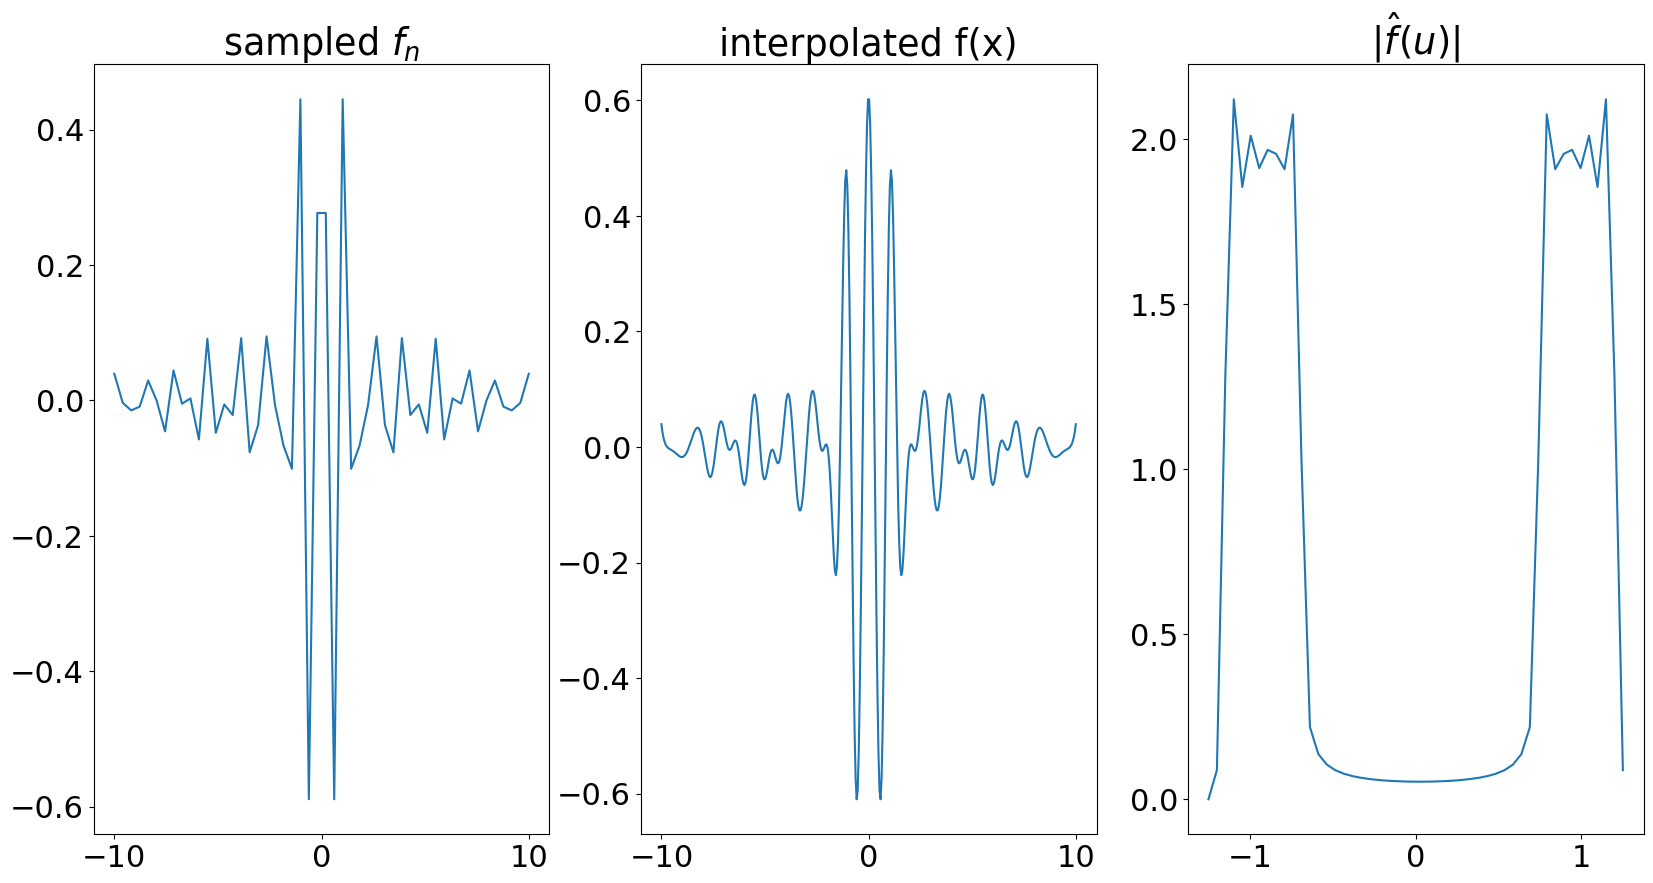

In [19]:
X=10
samplingRate=.4
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.sinc(np.pi*x/5)
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos_sinc1p25XNyquist.png')

First signal,

1.1x under sampling
sampling rate .5$\times$1.1, 1.1 times Nyquist

<ipython-input-99-5a8aab16c5b5>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


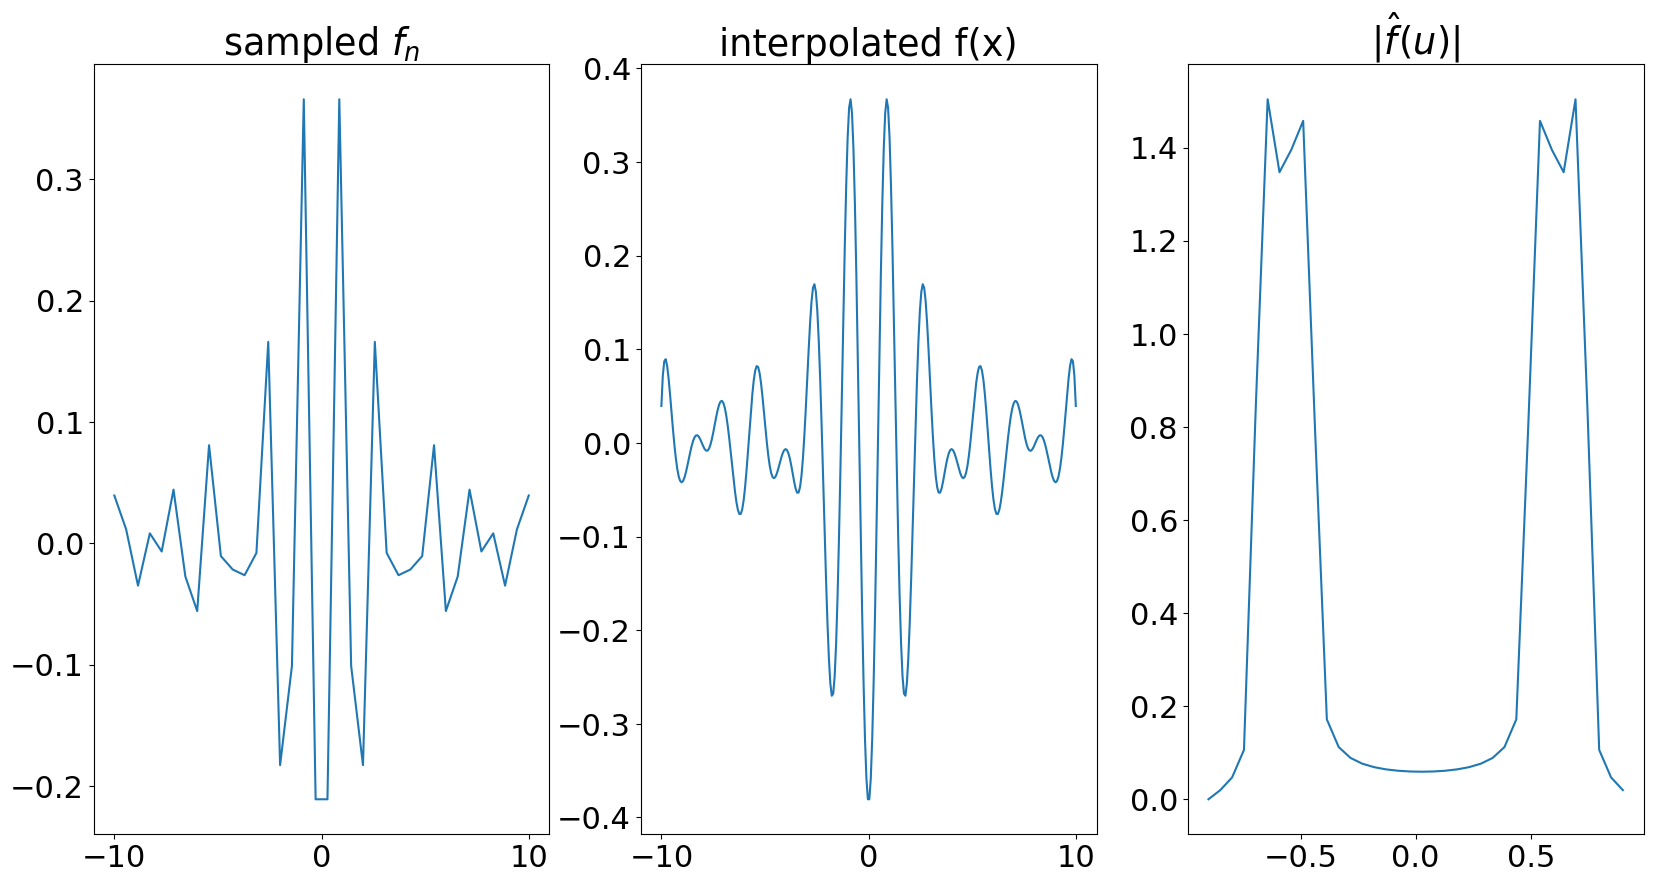

In [99]:
X=10
samplingRate=.5*1.1
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.sinc(np.pi*x/5)
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos_sinc1p1XNyquist.png')

Second signal,

5x over sampling
sampling rate .1, 5 times Nyquist

<ipython-input-72-370eb728852f>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


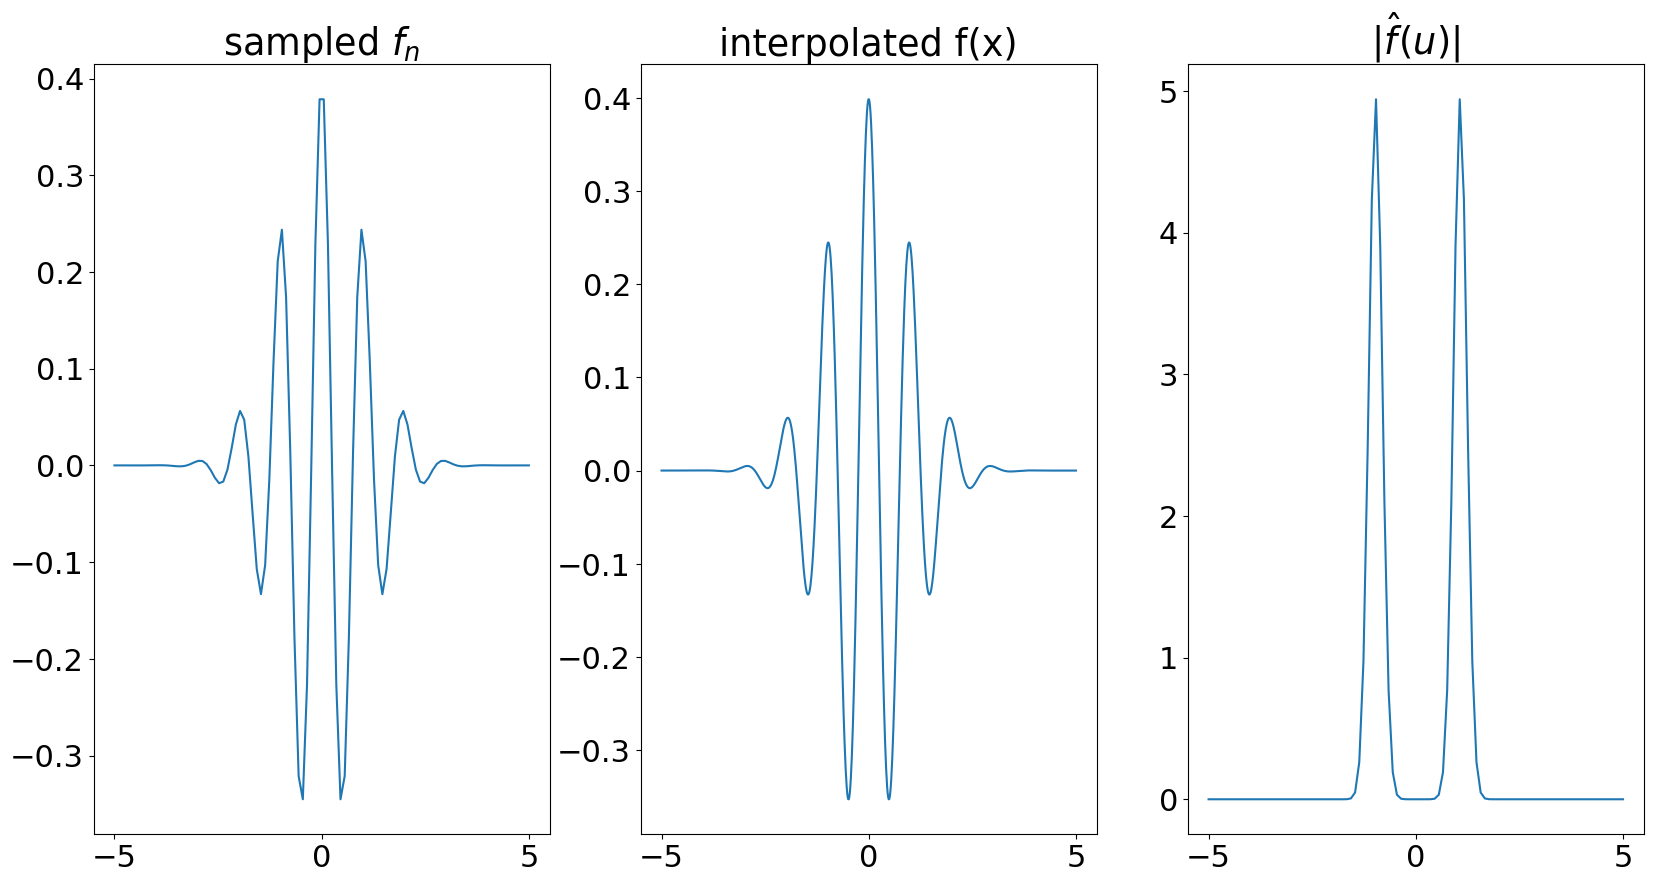

In [72]:
X=5
samplingRate=.1
N=np.int(2*X/samplingRate)
B=N/(4*X)
sigma=1
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x)**2/(2*sigma**2)))
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos_gauss5XNyquist.png')

Second signal,

1.5x over sampling
sampling rate 1/3, 1.5 times Nyquist

<ipython-input-78-13b409cda58e>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


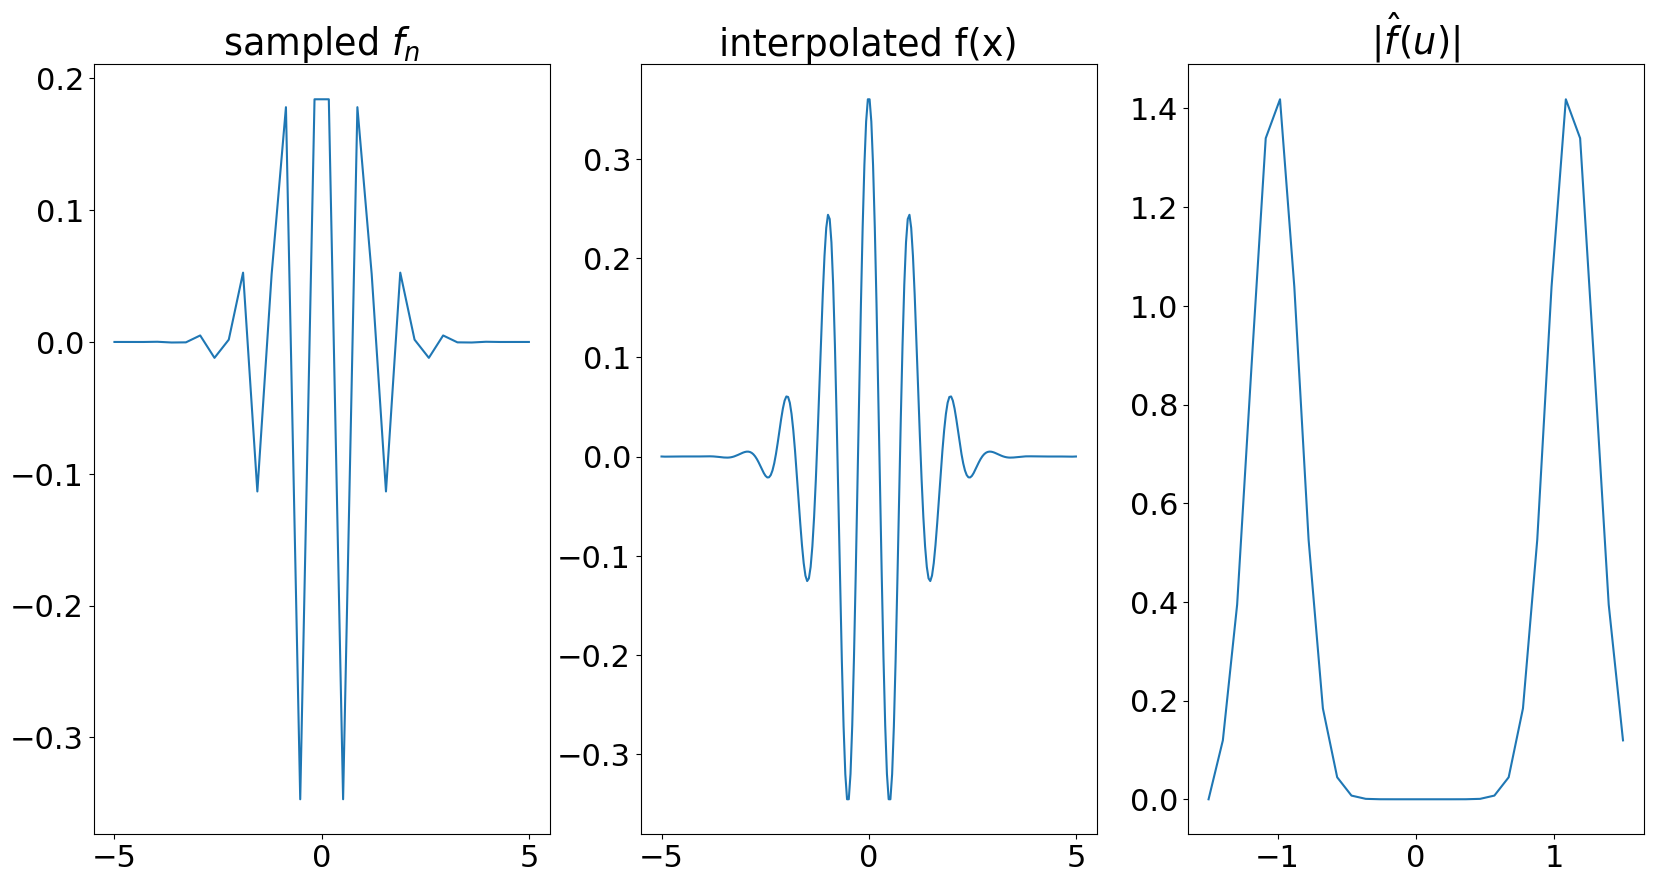

In [78]:
X=5
samplingRate=1/3
N=np.int(2*X/samplingRate)
B=N/(4*X)
sigma=1
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x)**2/(2*sigma**2)))
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos_gauss1p5XNyquist.png')

Second signal,

1.25x over sampling
sampling rate .4, 1.25 times Nyquist

<ipython-input-79-f306067f752d>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


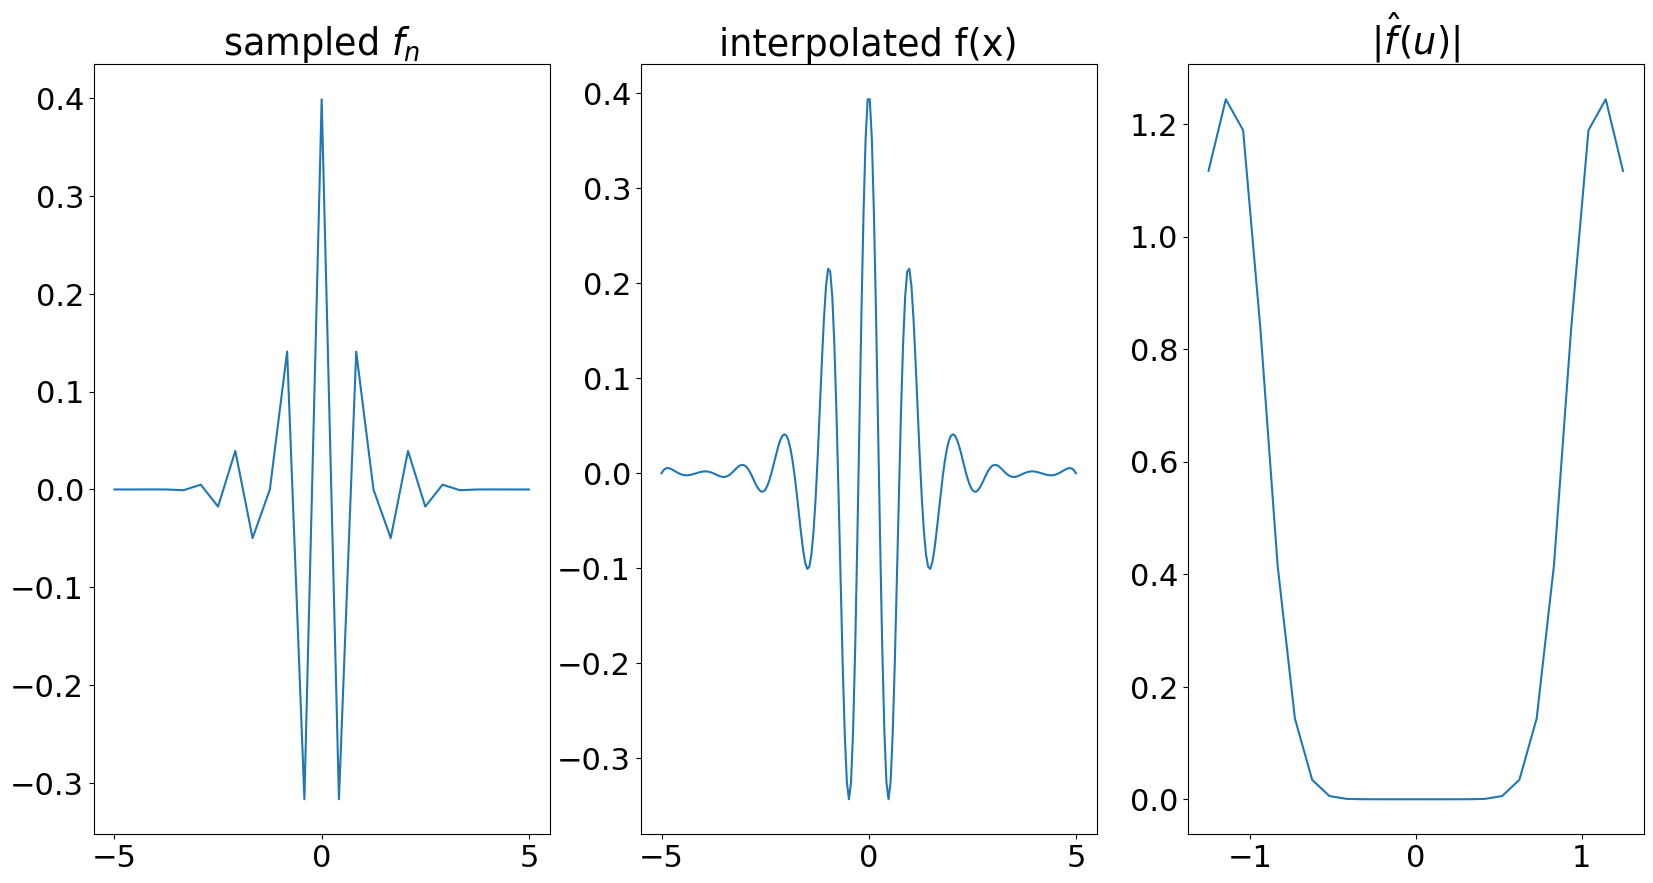

In [79]:
X=5
samplingRate=.4
N=np.int(2*X/samplingRate)
B=N/(4*X)
sigma=1
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x)**2/(2*sigma**2)))
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos_gauss1p25XNyquist.png')

Second signal,

1.1x under sampling
sampling rate .5$\times$1.1, 1.1  times Nyquist

<ipython-input-102-6c8e97c9c264>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


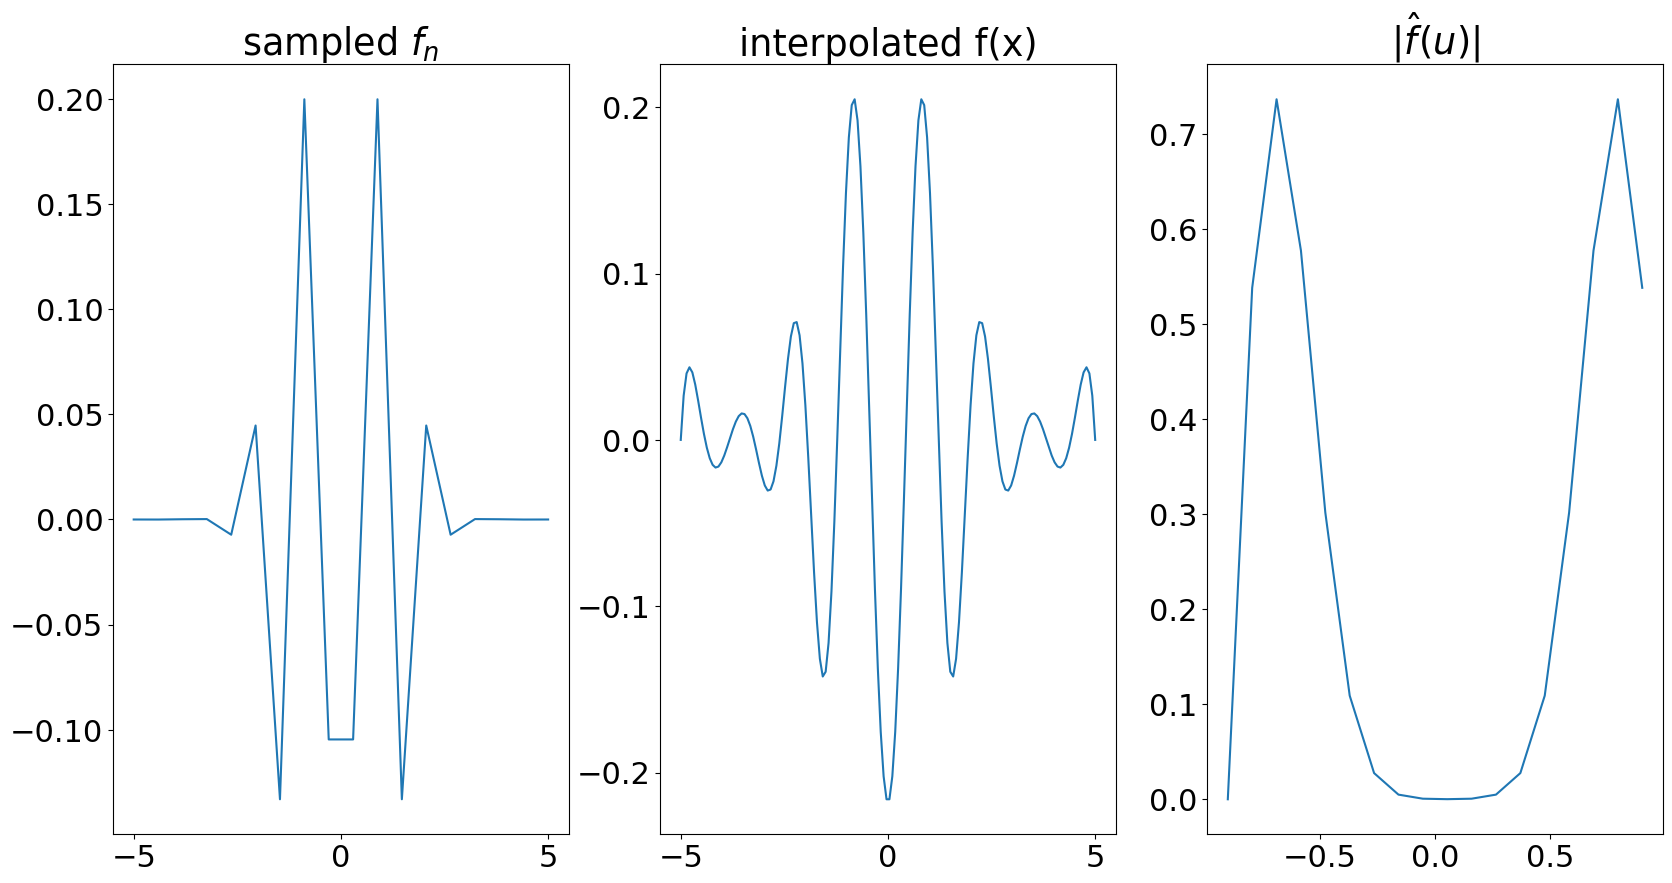

In [102]:
X=5
samplingRate=.5*1.1
N=np.int(2*X/samplingRate)
B=N/(4*X)
sigma=1
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x)**2/(2*sigma**2)))
  return f
# interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos_gauss1p1XNyquist.png')

Third signal,

5x over sampling
sampling rate .1, 5 times Nyquist

<ipython-input-87-919be8c6c5ef>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


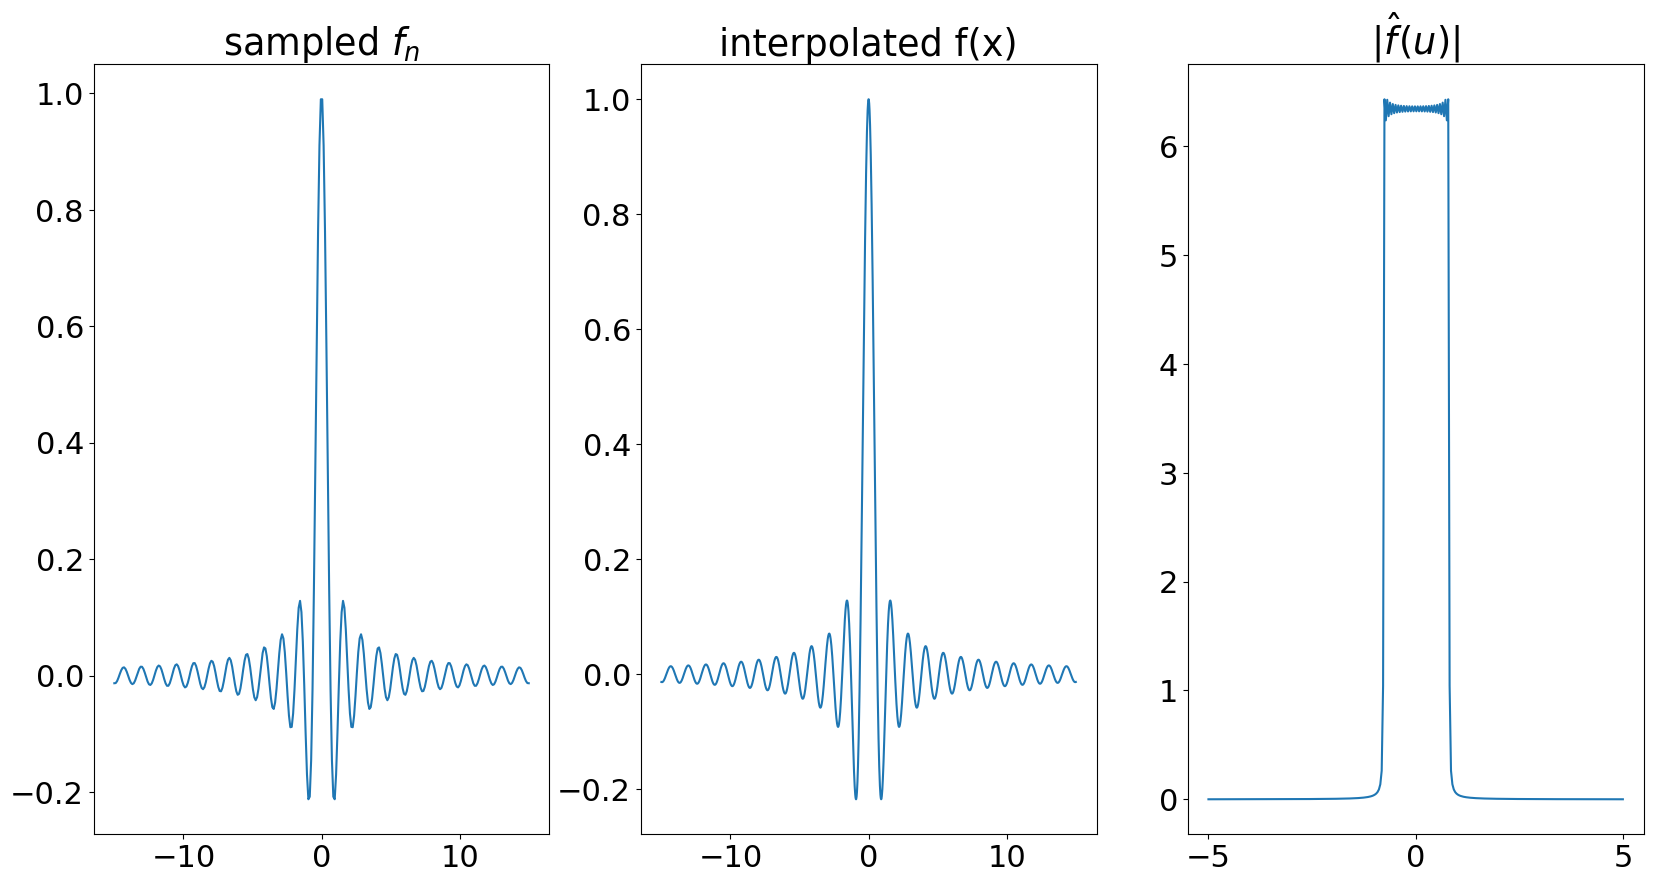

In [87]:
X=15
samplingRate=.1
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.sinc(.5*np.pi*x)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('sinc5XNyquist.png')

Third signal,

1.5x over sampling
sampling rate 1/3, 1.5 times Nyquist

<ipython-input-88-a409d71cf291>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


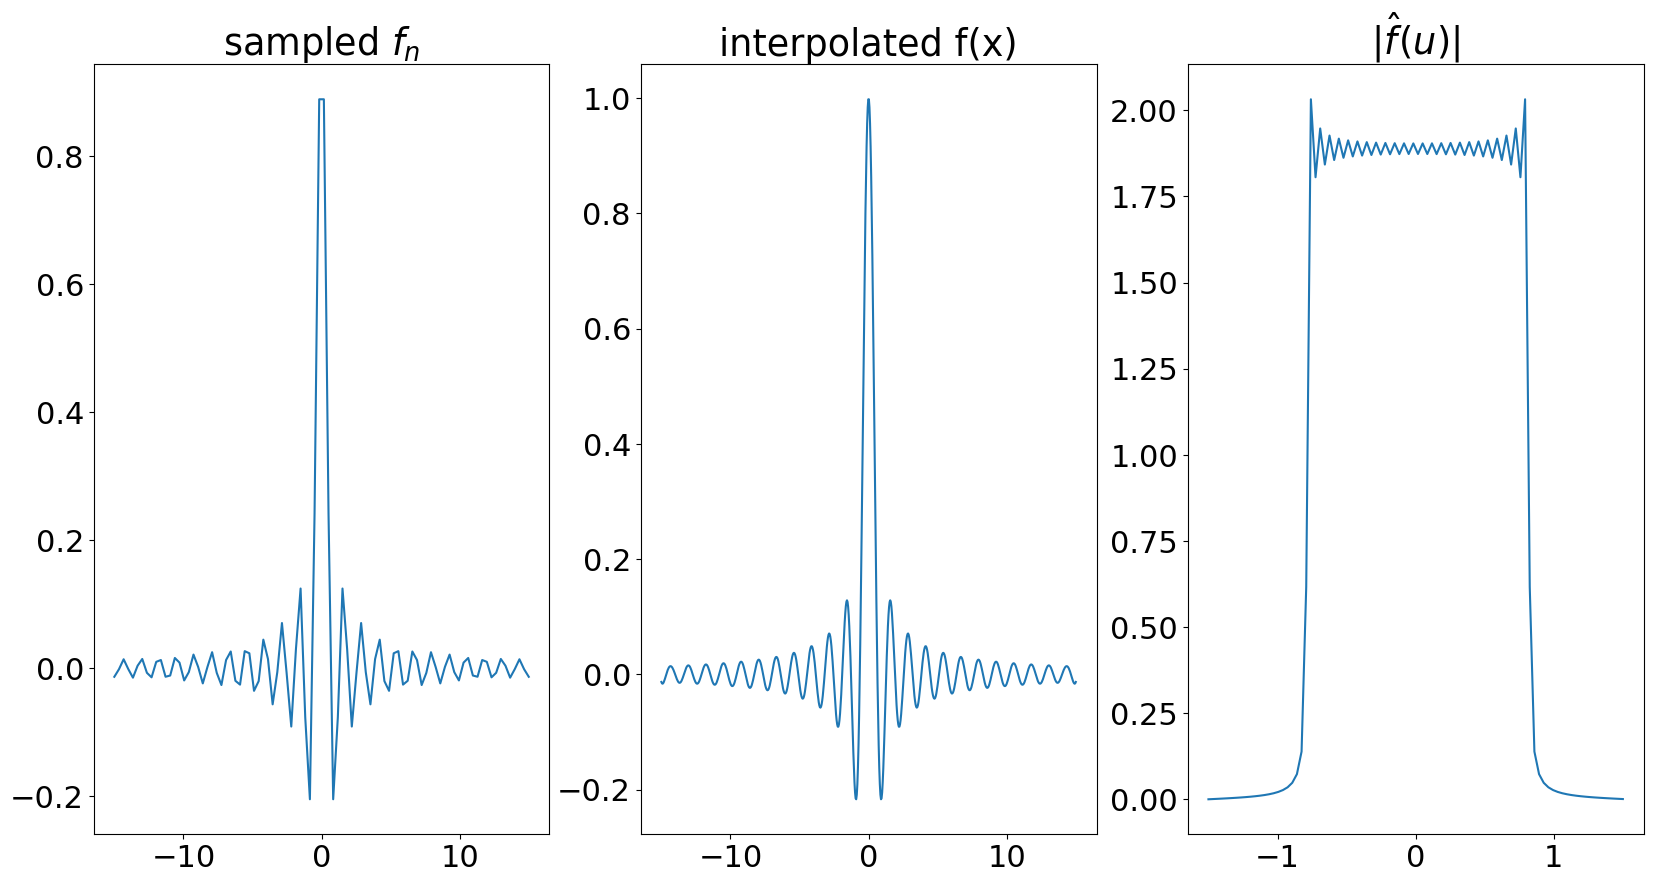

In [88]:
X=15
samplingRate=1/3
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.sinc(.5*np.pi*x)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('sinc5XNyquist.png')

Third signal,

1.1x over sampling
sampling rate .5/1.1, 1.1 times Nyquist

<ipython-input-94-1b4702b1f556>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


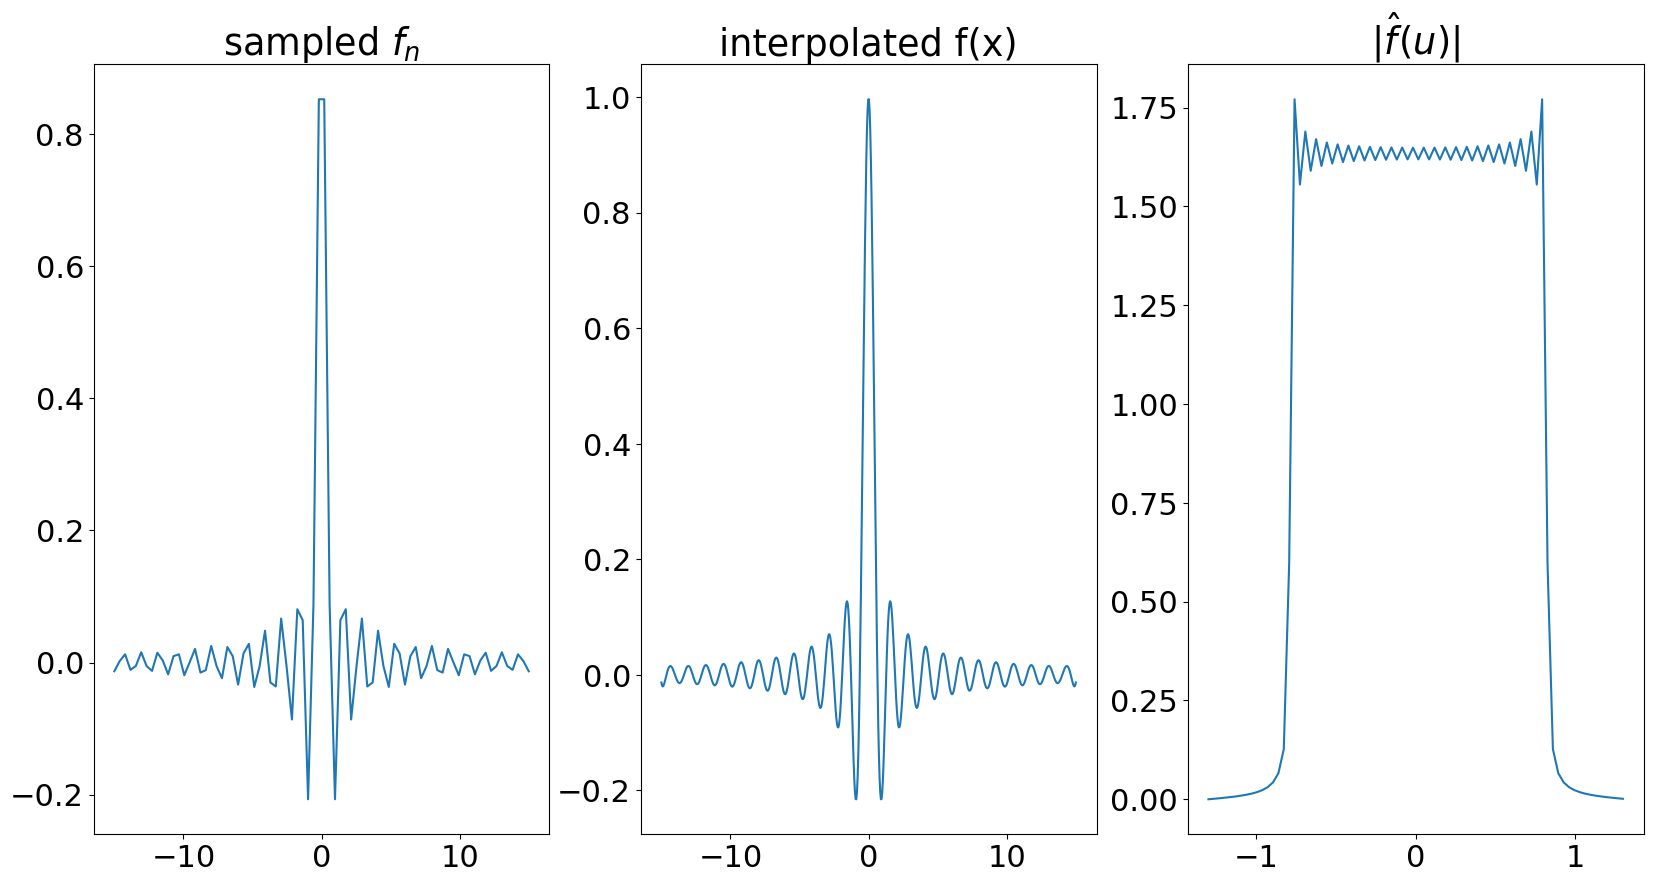

In [94]:
X=15
samplingRate=.5/1.1
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.sinc(.5*np.pi*x)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('sinc5XNyquist.png')

Third signal,

1.1x under sampling
sampling rate .5$\times$1.1, 1.1 times Nyquist

<ipython-input-97-c4a142bd58ef>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X/samplingRate)


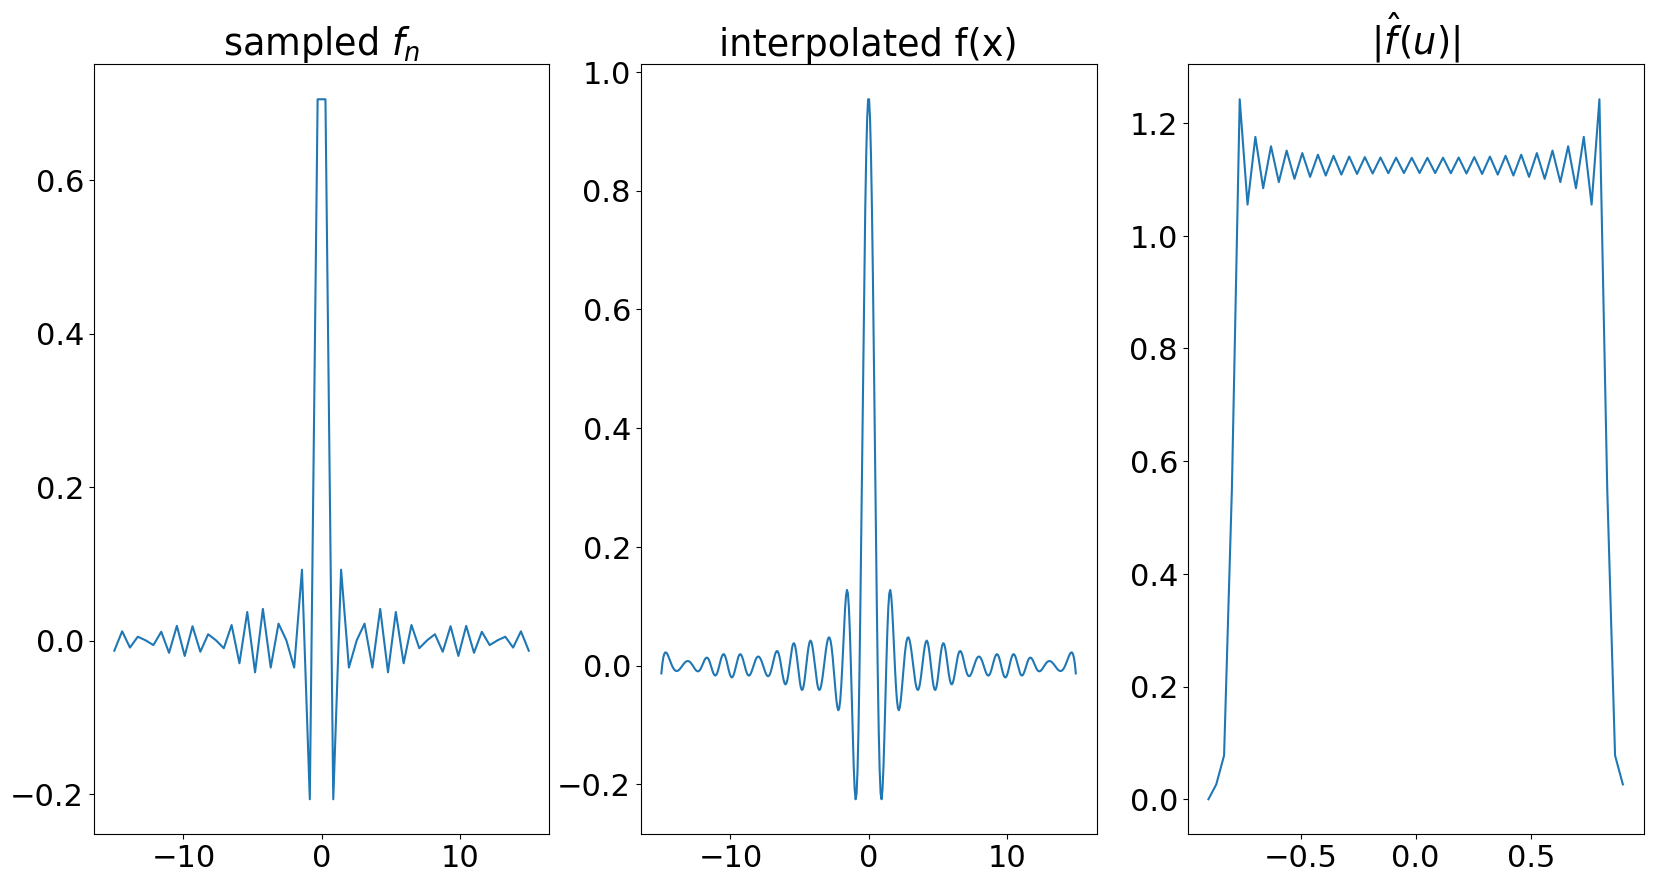

In [97]:
X=15
samplingRate=.5*1.1
N=np.int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.sinc(.5*np.pi*x)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('sinc5XNyquist.png')

Harr sampling strategy setup

In [126]:
X1=10
def f1(x):
  f1=np.cos(2*np.pi*x)*np.sinc(np.pi*x/5)
  return f1
def gn1(delta=1):
  N=np.int(2*X1/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f1,(-X1+pop*delta),(-X1+(pop+1)*delta))[0]
  return gg

X2=5
def f2(x):
  f2=np.cos(2*np.pi*x)*(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x)**2/(2*sigma**2)))
  return f2
def gn2(delta=1):
  N=np.int(2*X2/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f2,(-X2+pop*delta),(-X2+(pop+1)*delta))[0]
  return gg

X3=15
def f3(x):
  f3=np.sinc(.5*np.pi*x)
  return f3
def gn3(delta=1):
  N=np.int(2*X3/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f3,(-X3+pop*delta),(-X3+(pop+1)*delta))[0]
  return gg



Function 1 sampling periods

<ipython-input-126-7fb28a927205>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X1/delta)


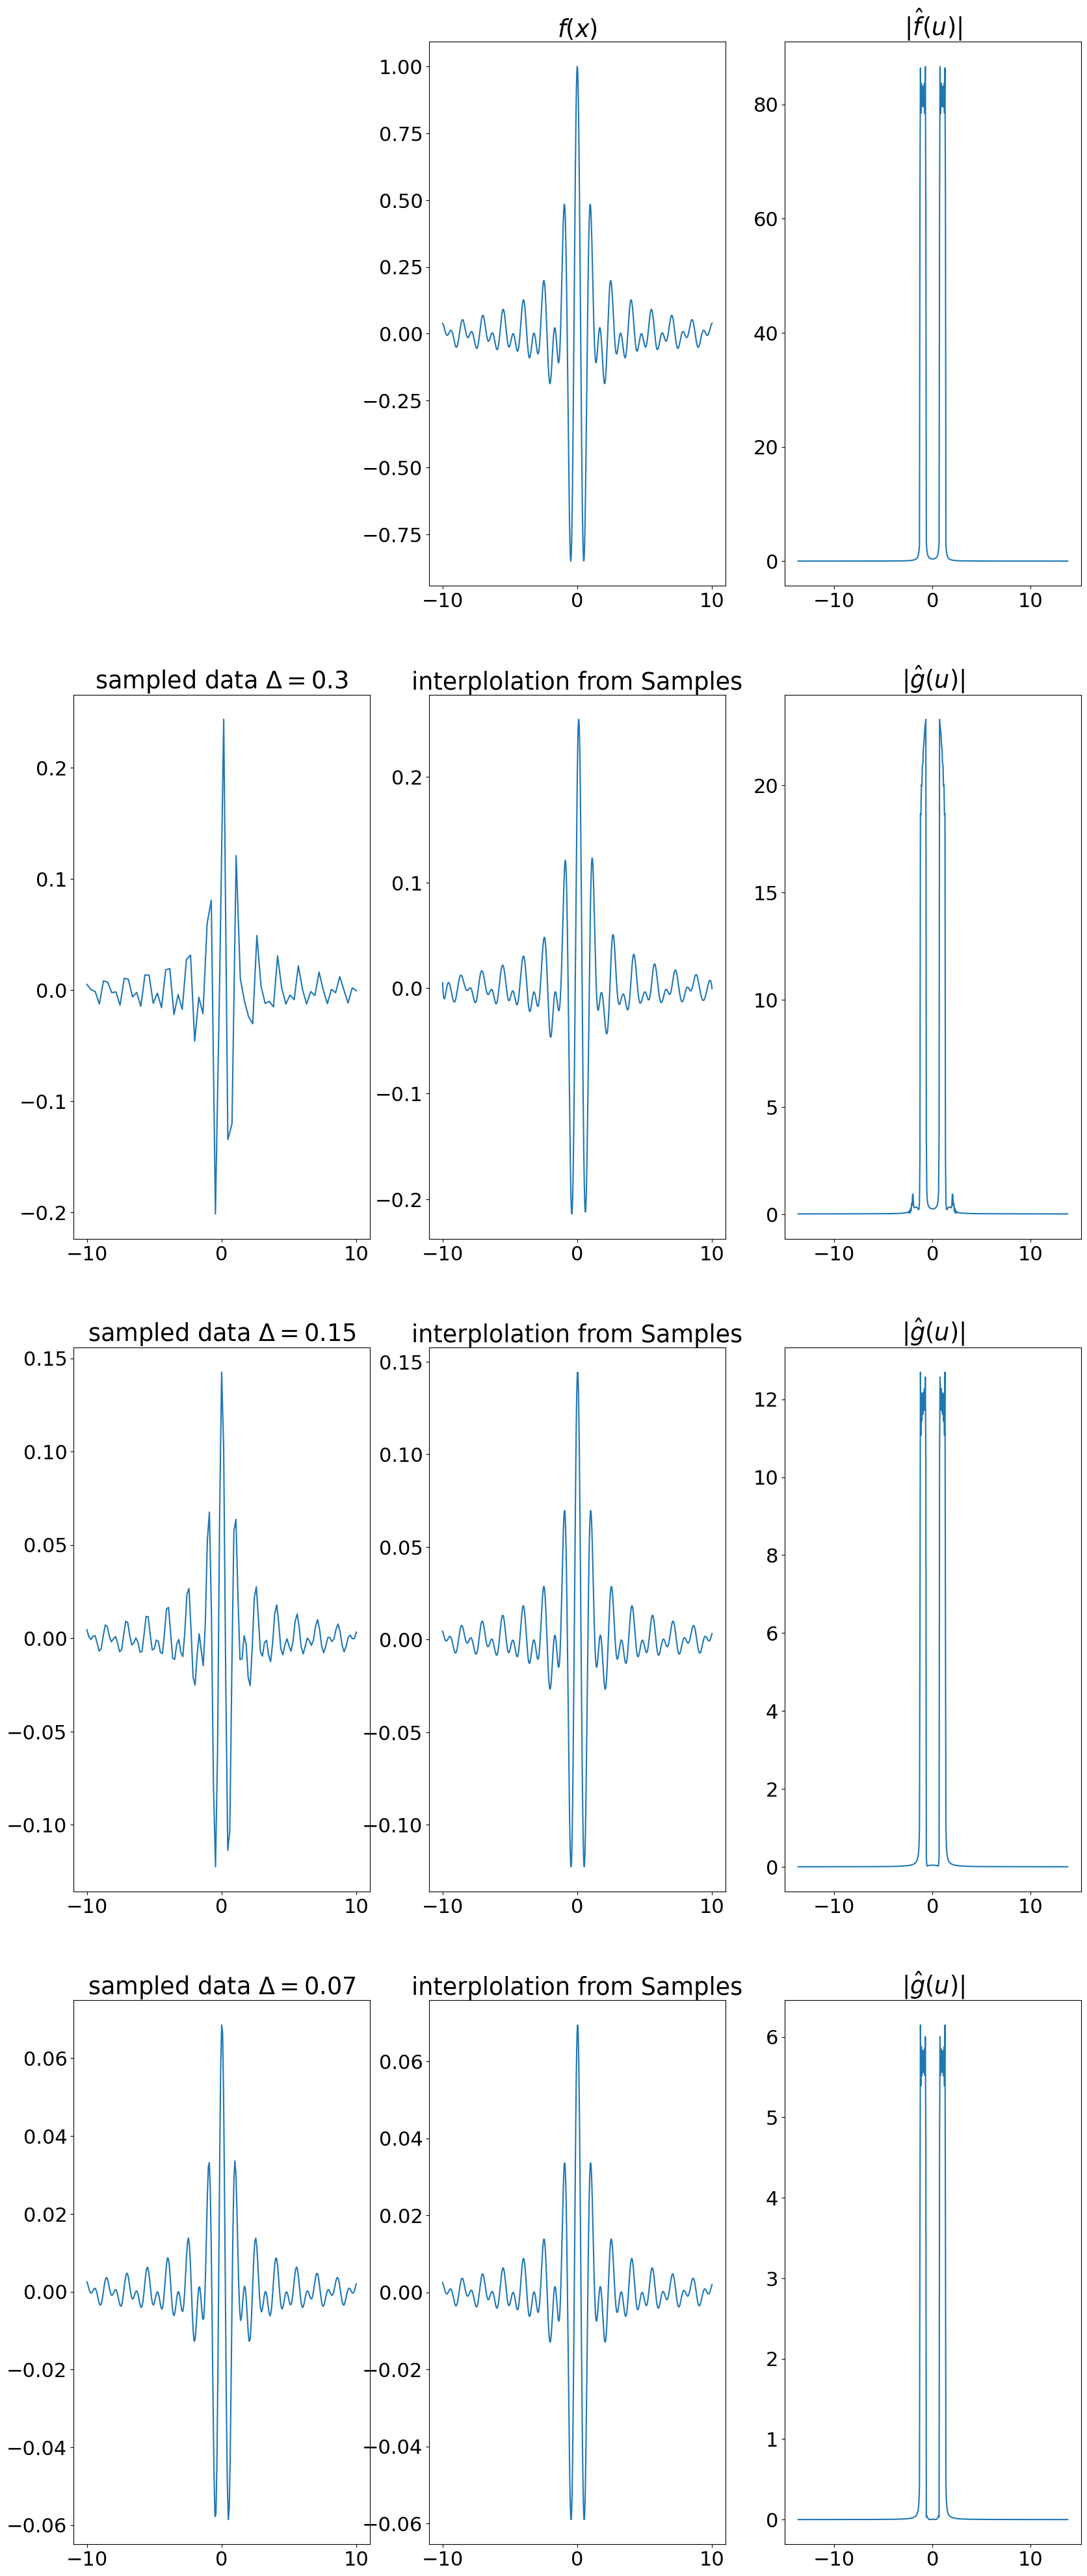

In [127]:
plt.rcParams['figure.figsize'] = [20, 50]
X=10
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)
plt.subplot(4,3,2)
plt.plot(xrange,f1(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f1(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')
plt.subplot(4,3,4)
gN=gn1(.3)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.3$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,7)
gN=gn1(.15)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.15$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,10)
gN=gn1(.07)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.07$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.savefig('sampleFiltering.png')




Function 2 sampling periods

<ipython-input-126-7fb28a927205>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X2/delta)


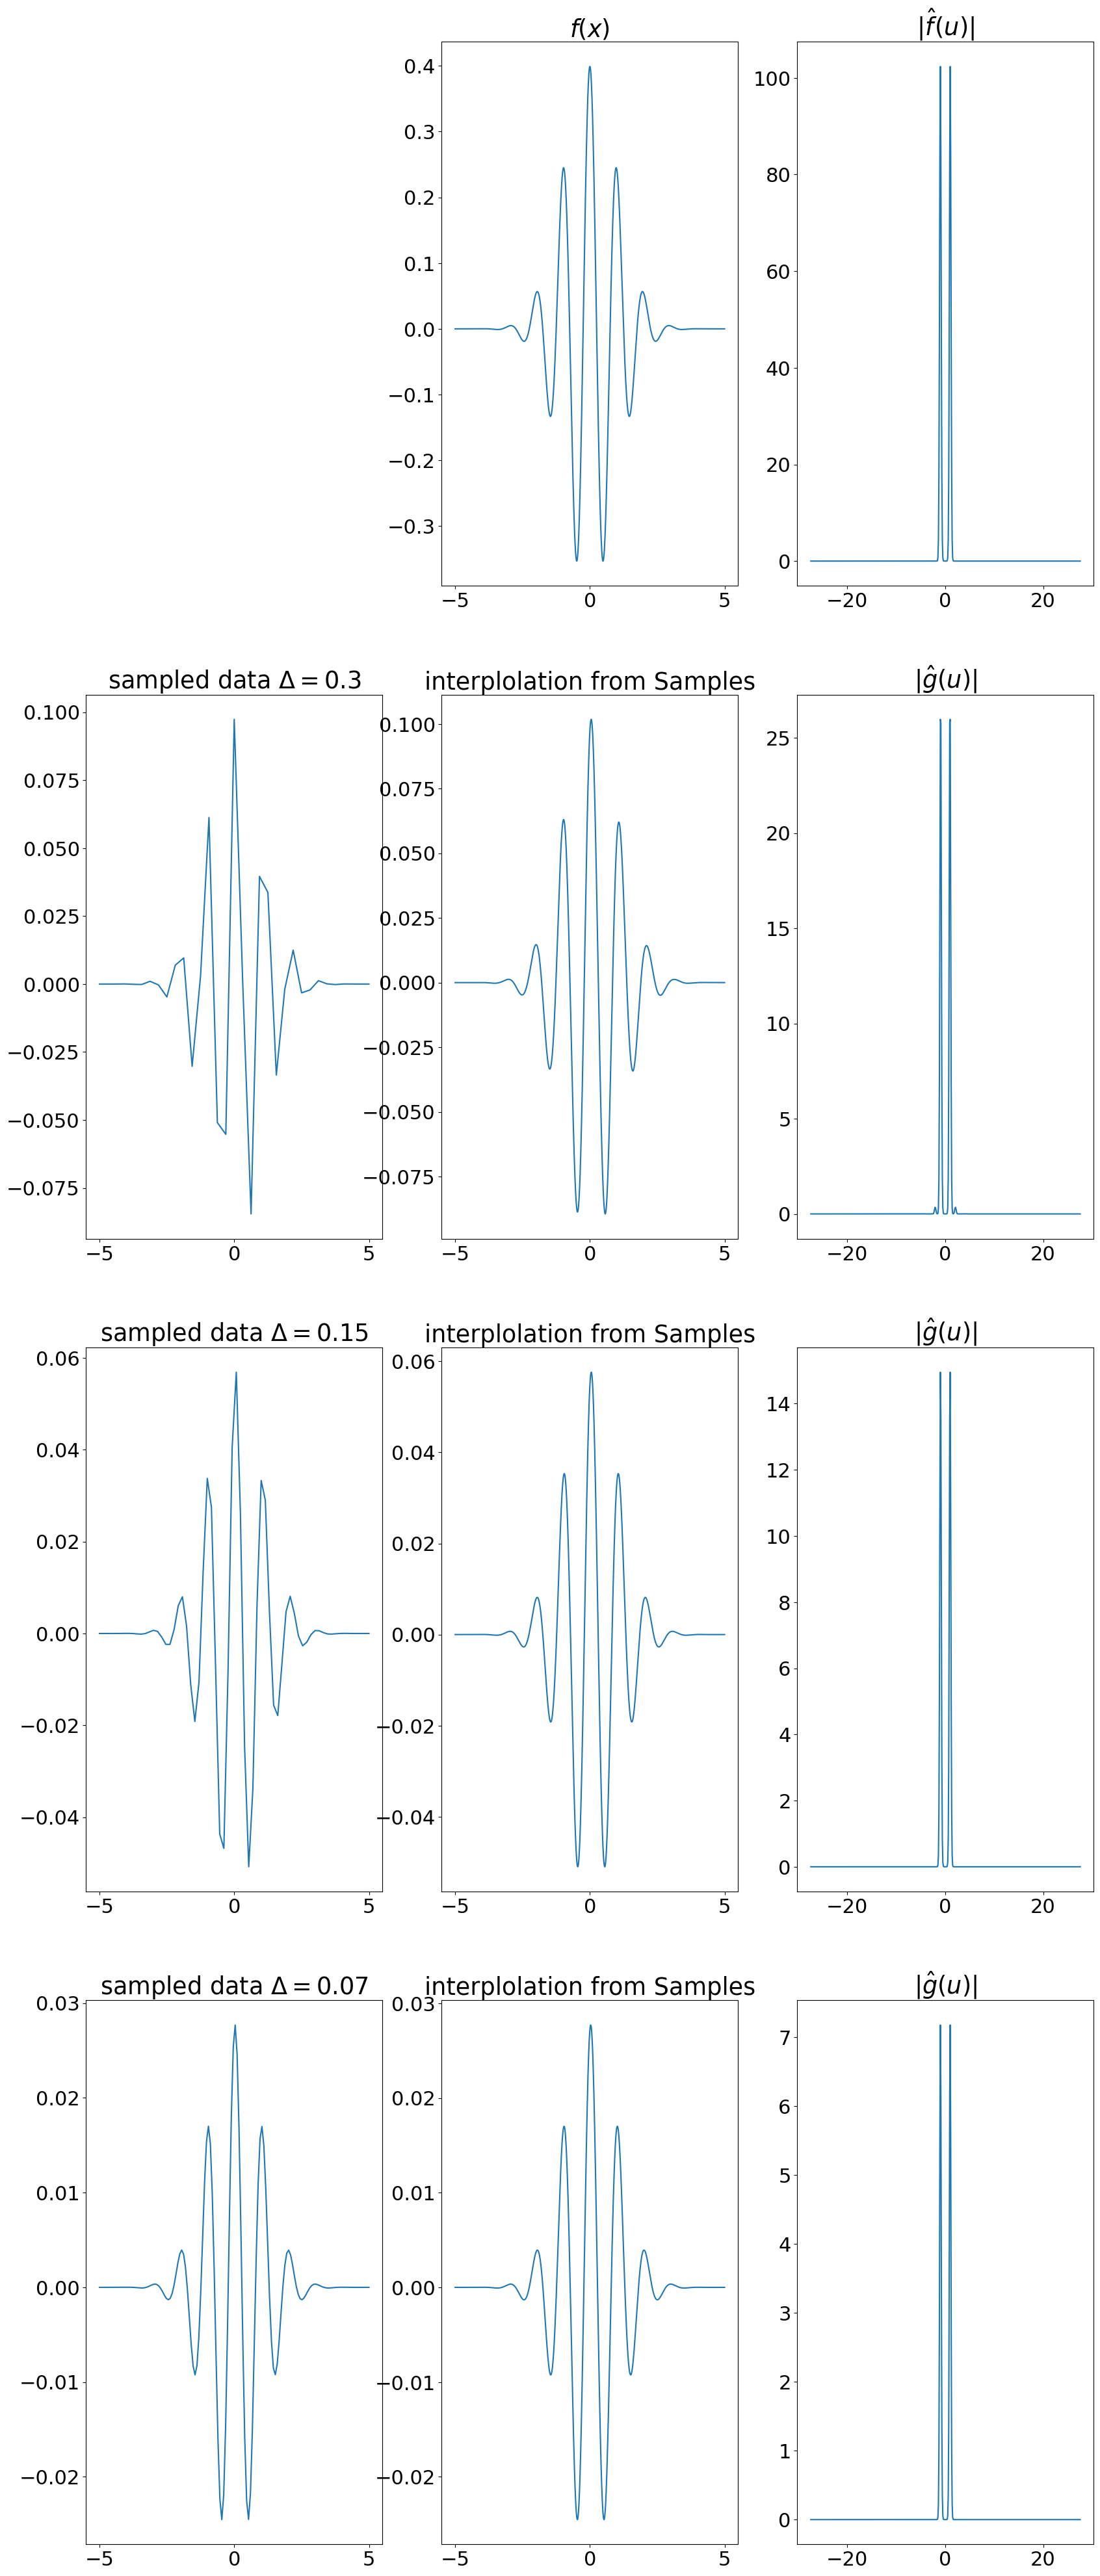

In [128]:
plt.rcParams['figure.figsize'] = [20, 50]
X=5
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)
plt.subplot(4,3,2)
plt.plot(xrange,f2(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f2(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')
plt.subplot(4,3,4)
gN=gn2(.3)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.3$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,7)
gN=gn2(.15)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.15$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,10)
gN=gn2(.07)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.07$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.savefig('sampleFiltering.png')




Function 3 sampling periods

<ipython-input-126-7fb28a927205>:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(2*X3/delta)


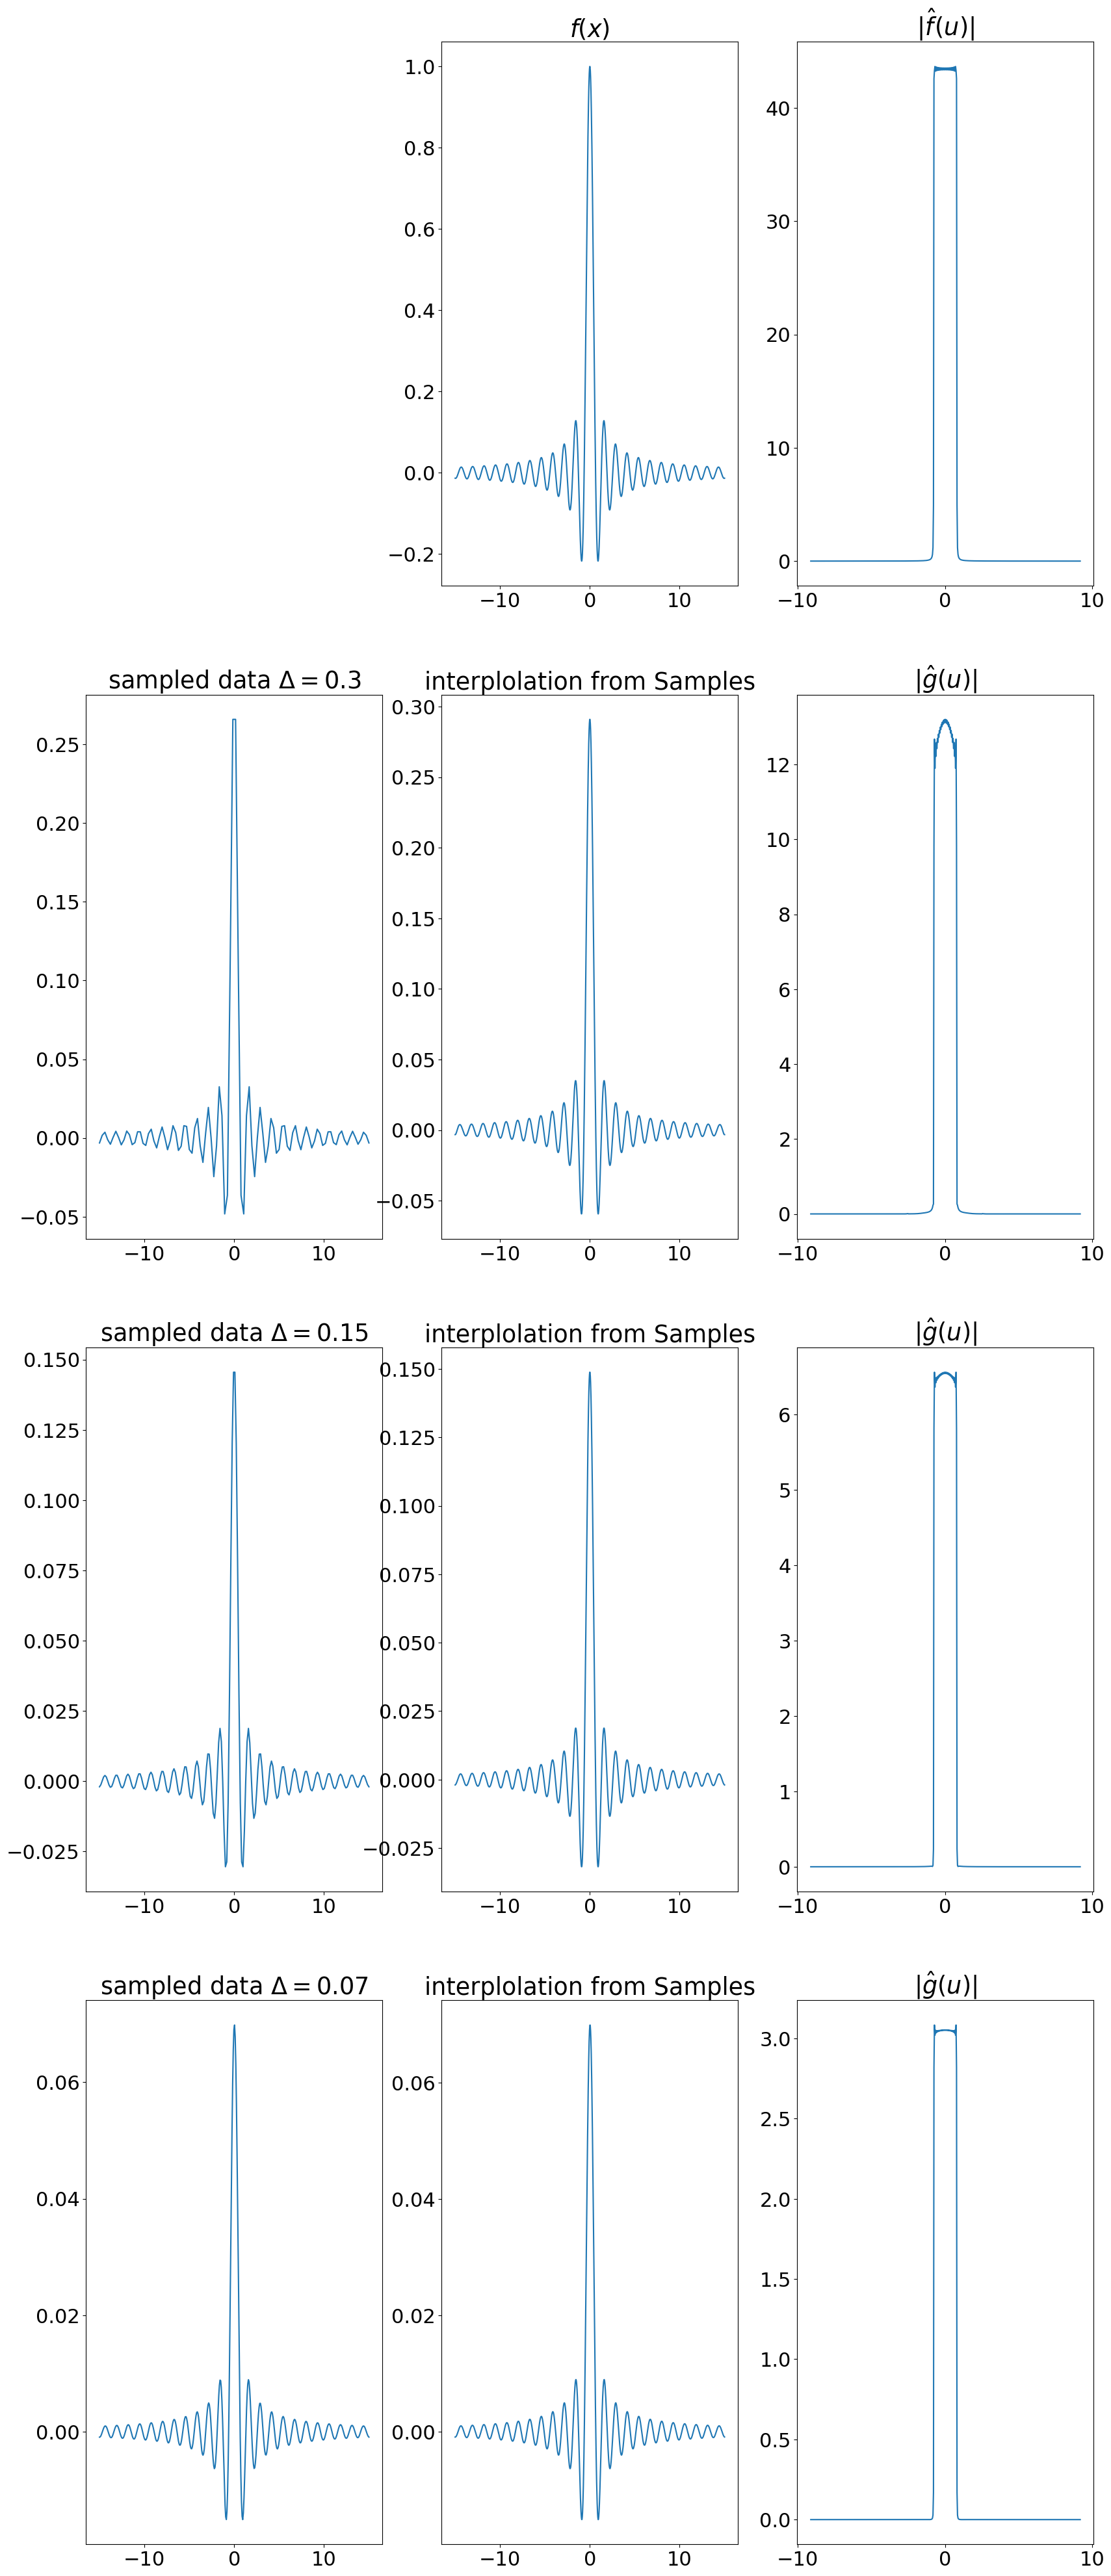

In [129]:
plt.rcParams['figure.figsize'] = [20, 50]
X=15
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)
plt.subplot(4,3,2)
plt.plot(xrange,f3(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f3(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')
plt.subplot(4,3,4)
gN=gn3(.3)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.3$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,7)
gN=gn3(.15)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.15$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,10)
gN=gn3(.07)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.07$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.savefig('sampleFiltering.png')


